# Gestalt <del>Laws</del> Principles

## First Part - Necessary Code

In [1]:
import random
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.patches import Polygon, Circle, Wedge, FancyBboxPatch, BoxStyle
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
connection_data = pd.read_csv("../data/gestalt_principles.csv")

In [3]:
# Import company colors
with open('plot_colors.json', 'r') as pc:
    color_dict = json.load(pc)

c_light, c_dark, c_blue = color_dict['color_light'], color_dict['color_dark'], color_dict['color_blue']

# Define color map for plotting
color_map = ListedColormap([c_blue, c_light, c_dark])

### Proximity - 2005 Sales Plot

In [4]:
# Create Data
width = 0.40
x_sales = np.arange(12)
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
budget = [2000, 2400, 2600, 2400, 2600, 3000, 2500, 2800, 3000, 2900, 3100, 3500]
actual = [1000, 1700, 2000, 1600, 2100, 2500, 2200, 2500, 2900, 2700, 3000, 3900]

# Define plotting function
def sales_plot(figsize=(15,7), barplot=True):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if barplot:
        bud = ax.bar(x_sales-0.2, budget, width, color=c_light, label="budget")
        act = ax.bar(x_sales+0.2, actual, width, color=c_dark, label="actual")
    else:
        bud,_ = ax.plot(x_sales, budget, width, linewidth=3, color=c_light, label="budget")
        act,_ = ax.plot(x_sales, actual, width, linewidth=3, color=c_dark, label="actual")
        
    ax.set_xticks(x_sales)
    ax.set_xticklabels(month, fontsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_ylim(0,)
    ax.set_ylabel("U.S. $", fontsize=16)
    ax.legend(handles=[bud, act], title="2005 Sales", title_fontsize=14, fontsize=12, loc=9, ncols=2)
    sns.despine()

### Dots

In [5]:
def create_points(x_min, x_max, y_min, y_max, x_amount, y_amount):
    x_dots = np.linspace(x_min, x_max, x_amount) + 0.2
    y_dots = np.linspace(y_min, y_max, y_amount) + 0.2
    array1, array2 = np.meshgrid(x_dots, y_dots)
    labels = np.zeros(array1.shape)
    return array1, array2, labels

In [6]:
array1a, array2a, labels_a = create_points(0, 6, 0, 5, 6, 5)
labels_a[1,:] = 1
labels_a[3,:] = 1

array1b, array2b,_ = create_points(0, 9, 0, 5, 9, 5)
array1c, array2c,_ = create_points(0, 6, 2, 5, 6, 5)

array1_groups, array2_groups,_ = create_points(0, 6, 2, 5, 6, 5)
array1_groups[:,1:2] = array1_groups[:,1:2] - 0.5
array1_groups[:,2:3] = array1_groups[:,2:3] - 1
array1_groups[:, 4:5] = array1_groups[:, 4:5] + 0.5

In [7]:
def plot_points(x_array, y_array, labels=None, squares=False, rectangle_large=False, rectangle_small=False, figsize=(10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    
    if rectangle_large:
        rectangle = plt.Rectangle((3.5, 2), 3, 3.4, fc=c_light, alpha=0.5, ec=c_dark)
        ax.add_patch(rectangle)
        
    if rectangle_small:
        rectangle = plt.Rectangle((0, 4.2), 1.8, 1.2, fc=c_light, alpha=0.5, ec=c_dark)
        ax.add_patch(rectangle)
    
    if labels is None:
        ax.scatter(x_array, y_array, s=600, c=c_blue)
    elif squares: 
        ax.scatter(x_array[labels == 0], y_array[labels == 0], s=600, c=c_blue)
        ax.scatter(x_array[labels > 0], y_array[labels > 0], s=600, marker='s', c=c_blue)
    else:
        ax.scatter(x_array, y_array, s=600, c=labels, cmap=color_map)
    
        
    ax.set_xlim(0, )
    ax.set_ylim(0, )
    plt.axis("off")

In [8]:
# Define location of dots
x_scatter = [1, 1.2, 1.5, 2.1, 2, 3, 2, 1.9, 2.6, 2.3, 2.9, 3, 4, 4.5, 5.5, 6.2, 6.2, 6.2,
            6.6, 6.8, 7.1, 9.5, 8.8, 9.8, 8.7, 8.5, 9.2, 10, 9.6, 10.3]

y_scatter = [2.2, 4, 0.8, 1, 2, 2.1, 3, 4, 3.2, 4.1, 4.1, 3.5, 3, 4, 5, 3.2, 3.9, 4.5,
            4.2, 3.5, 3.9, 2.5, 4.8, 4.6, 5.7, 6.3, 6.1, 6, 5.5, 5.3]

labels_scatter = [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]

def plot_scatter(x_scatter, y_scatter, labels=None, polygon=False, figsize=(15, 8), facecolor=None):
    fig, ax = plt.subplots(figsize=figsize, facecolor=facecolor)
    if facecolor is not None:
        ax.set_facecolor(facecolor)
    
    if polygon:
        polygon1 = Polygon([(6,3.5), (6.65,3.85), (7, 4.5), (5.5, 5.5), (5, 5)], fill=False, ec=c_dark, linewidth=3)
        polygon2 = Polygon([(0.5, 2.2), (1,1.5), (1.8,2.4), (3.3, 2.9), (3.5, 4.5), (1, 4.4)], fill=False, ec=c_dark, linewidth=3)
        ax.add_patch(polygon1)
        ax.add_patch(polygon2)
    
    if labels is None:
        ax.scatter(x_scatter, y_scatter, s=500, c=c_blue)
    else:
        ax.scatter(x_scatter, y_scatter, s=500, c=labels_scatter, cmap=color_map)
    
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 8)
    ax.set_xticks([])
    ax.set_yticks([])
    sns.despine()

### Closure - Circle and Rectangle

In [9]:
def circle_rectangle(separate=False, figsize=(15,8)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('equal')
    
    xc, yc = -0.02, 0
    xr, yr = -0.02, -0.025
    
    if separate:
        xc -= 0.005
        yc += 0.005
        xr += 0.02
        yr -= 0.002
        
    # Add circle
    circle = Circle((xc, yc), radius=0.02, fill=False, linestyle= "-", linewidth=3, ec=c_blue)
    ax.add_patch(circle)
    
    if separate:
        circle_cover = plt.Rectangle((-0.025, -0.02), 0.021, 0.025, fc="white", ec="white")
        ax.add_patch(circle_cover)
    
    # Add rectangle
    rectangle = plt.Rectangle((xr, yr), 0.05, 0.025, fc=c_dark, ec=c_dark)
    ax.add_patch(rectangle)
    
    plt.axis("off")

### Continuity

In [10]:
x_continuity = [1, 2, 3, 4, 5, 6, 7, 8, 9, 1.8, 2.2, 3,   3.7, 4.2, 4.7, 5.5, 5.9, 6.5, 7.2, 7.9, 8.5]
y_continuity = [4, 4, 4, 4, 4, 4, 4, 4, 4, 5.8, 6.2, 6.5, 6.1, 5.5, 4.9, 3.1, 2.4, 1.9, 1.4, 1.1, 1.1]
labels_continuity_1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
labels_continuity_2 = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,]

def plot_continuity(labels=None, figsize=(15,8)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(x_continuity, y_continuity, s=600, c=labels, cmap=color_map)
    plt.axis("off")

In [11]:
# Data Bar chart (number of contributors on 2.08.2023)
library = ["numPy", "pandas", "statsmodels", "scikit-learn", "scipy", "matplotlib", "plotly", "TensorFlow"]
contributors = [1510, 2986, 355, 2694, 1352, 1314, 220, 3410]

def plot_libraries(figsize=(10,8), sort=False):
    fig, ax = plt.subplots(figsize=figsize)
    
    if sort:
        sorted_list = sorted(zip(library, contributors), key=lambda x: x[1])
        library_sorted, contributors_sorted = list(zip(*sorted_list))
        ax.barh(library_sorted, contributors_sorted, color=c_blue)
        ax.set_yticklabels(library_sorted, fontsize=12)
    else:    
        ax.barh(library, contributors, color=c_blue)
        ax.set_yticklabels(library, fontsize=12)
        
    ax.set_title("Number of contributors to popular Data Science Libraries on Github", fontsize=16)
    ax.set_xlabel("Number of contributors", fontsize=14)
    ax.set_ylabel("Library", fontsize=14)
    
    ax.tick_params(axis='x', labelsize=12)
    sns.despine()

In [12]:
# Function for plotting rectangle with polygon
def plot_rectangel_polygon(offset=0, weird_version=False, figsize = (15,8)):
    fig, ax = plt.subplots(figsize=figsize)
    
    rectangle = Polygon([(0.3, 0.2), (0.7, 0.2),
                         (0.7, 0.5), (0.3, 0.5)],
                         fill=False, closed=True)
    
    polygon = Polygon([(0.25, 0.7+offset), (0.35, 0.6+offset),
                       (0.4, 0.5+offset), (0.41, 0.45+offset),
                       (0.43, 0.4+offset), (0.5, 0.35+offset) ,
                       (0.55, 0.4+offset), (0.57, 0.5+offset),
                       (0.6, 0.6+offset), (0.65, 0.63+offset)], 
                       fill=False, closed=False)
    
    if weird_version:
        rectangle = Polygon([(0.3, 0.2), (0.7, 0.2),
                             (0.7, 0.5), (0.57, 0.5),
                             (0.55, 0.4), (0.5, 0.35),
                             (0.43, 0.4), (0.41, 0.45),
                             (0.4, 0.5), (0.3, 0.5)],
                             fill=False, closed=True)
        
        polygon = Polygon([(0.25, 0.9), (0.35, 0.8),
                           (0.4, 0.7), (0.57, 0.7),
                           (0.6, 0.8), (0.65, 0.83)], 
                           fill=False, closed=False)
        
    else:
        rectangle = Polygon([(0.3, 0.2), (0.7, 0.2),
                             (0.7, 0.5), (0.3, 0.5)],
                             fill=False, closed=True)
    
        polygon = Polygon([(0.25, 0.7+offset), (0.35, 0.6+offset),
                           (0.4, 0.5+offset), (0.41, 0.45+offset),
                           (0.43, 0.4+offset), (0.5, 0.35+offset) ,
                           (0.55, 0.4+offset), (0.57, 0.5+offset),
                           (0.6, 0.6+offset), (0.65, 0.63+offset)], 
                           fill=False, closed=False)
        
    
    ax.add_patch(rectangle)
    ax.add_patch(polygon)
    plt.axis("off")  

### Connection

In [13]:
x_connection = np.array([0.4, 0.6, 0.4, 0.6])
y_connection = np.array([0.8, 0.8, 0.2, 0.2])
labels_connection = np.array([0, 0, 1, 1])

def plot_connection(connection=True, rectangle=False, style="color", figsize=(15,8)):
    """
    style ['color', 'size', 'marker', None]
    """
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if style == "color":
        ax.scatter(x_connection, y_connection, s=2000, c=labels_connection, cmap=color_map, zorder=3)
    elif style == "size":
        ax.scatter(x_connection[labels_connection==0], y_connection[labels_connection==0], 
                   s=2000, c=c_dark, zorder=3)
        ax.scatter(x_connection[labels_connection==1], y_connection[labels_connection==1], 
                   s=8000, c=c_dark, zorder=3)
    elif style == "marker":
        ax.scatter(x_connection[labels_connection==0], y_connection[labels_connection==0], 
                   s=2000, c=c_dark, zorder=3)
        ax.scatter(x_connection[labels_connection==1], y_connection[labels_connection==1], 
                   s=2000, c=c_dark, zorder=3, marker="s")
    else:
        ax.scatter(x_connection, y_connection, s=2000, c=c_dark, zorder=3)
    

    # Add connection lines
    if connection:
        ax.axvline(x = 0.4, ymin=0.2, ymax=0.8, color=c_dark, linewidth=3, zorder=1)
        ax.axvline(x = 0.6, ymin=0.2, ymax=0.8, color=c_dark, linewidth=3, zorder=1)
    

    # Add rectangle 
    if rectangle:
        rect = plt.Rectangle((0.35, 0.125), 0.3, 0.15, fc=c_light, ec=c_dark)
        ax.add_patch(rect)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    plt.axis("off")

In [14]:
def plot_connection_data(data, color=False, line=False, figsize=(15,8)):

    fig, ax = plt.subplots(figsize=figsize)
    
    if color and not line: 
        ax.plot(data.index, data['series_1'], c=c_dark, marker='.', markersize=15, linestyle = 'None')
        ax.plot(data.index, data['series_2'], c=c_light, marker='.', markersize=15, linestyle = 'None')
    elif color and line:
        ax.plot(data.index, data['series_1'], c=c_dark, marker='.', markersize=15)
        ax.plot(data.index, data['series_2'], c=c_light, marker='.', markersize=15)
    else:    
        ax.plot(data.index, data['series_1'], c=c_dark, marker='.', markersize=15, linestyle = 'None')
        ax.plot(data.index, data['series_2'], c=c_dark, marker='.', markersize=15, linestyle = 'None')
    
    
    
    ax.set_ylim(1400,1900)
    plt.axis("off")

<div class=slide-title>
    
# Gestalt Laws
    
</div>

<div class=slide-title>
    
# Gestalt <del>Laws</del> Principles
    
</div>

<center>
    <img src="../images/gestalt_principles/pirate_guidelines.jpg" width=1100>
</center>

## Gestalt Principles of Grouping

Notes: Let’s be more specific about this. They’re grouping principles.
The type of interactivity I’d like in this session is ‘yell out answers, questions or comments’, so feel free to do so at any point.
If you’ve seen this before, I have another exercise for you: try to see them differently to the way you saw them last time. Can you do it?
So, here we go: the Gestalt principles of grouping!

<center>
    <b>"Gestalt" == pattern</b>
</center>

Notes: So for those of you whose German isn’t that hot, Gestalt is best translated here as ‘pattern’, but really it’s a reference to a theory of mind that originated in the Berlin School of experimental psychology in the early 1900s. It’s probably best summed up with this quote:

> The whole is other than the sum of the parts.

Kurt Koffka

<center>
<img src="../images/gestalt_principles/figures.png" width=600>
</center>    

Notes: So we see the tree before we notice the people.

<center>
<img src="../images/gestalt_principles/Kurt_Koffka.png">
</center>

Notes: The Gestalt perception guidelines are mostly down to these three:
Kurt Koffka(click), 

<center>
<img src="../images/gestalt_principles/Max_Wertheimer.png">
</center>

Notes: Max Wertheimer(click), 

<center>
<img src="../images/gestalt_principles/Wolfgang_Kohler.png">
</center>

Notes: and Wolfgang Kohler. 

They’re from that period when countries weren’t quite the same as they are today: Koffka’s from Berlin, which was still in the German empire, Wertheimer was born in Prague which was part of the Austro-Hungarian empire, and Kohler was born in Reval, which is now called Talinn and part of Estonia, but back then was part of the Russian empire. 

Kohler’s also noteworthy as the only one shown here in colour

<center>
<img src="../images/gestalt_principles/all_three.png">
</center>

<center>
<b>Regular, orderly, symmetrical, simple</b>
</center>

Notes: Their theory was that we tend to order our experience in a manner that is (CLICK) regular, orderly, symmetrical, and simple (So far, so German, you might be thinking)

But together, they came up with a set of perceptual guidelines that’s still relatively robust today, even if the mechanisms they proposed have since been discredited. There’s a bigger list, and some people have added to it, but today I’d like to focus on

<center>
    <b>Proximity</b>
</center>

<center>
    <b>Similarity</b>
</center>

<center>
    <b>Enclosure</b>
</center>

<center>
    <b>Closure</b>
</center>

<center>
    <b>Continuity</b>
</center>

<center>
    <b>Connection</b>
</center>

## What are they and why do they matter?

Notes: The goal of today’s session is to define them and show how they’re useful when we’re talking about visualization.

I’ll be asking questions as we go through, and you might occasionally get asked to draw something. I can’t force you to answer or sketch, but it’d be really handy if you did.

### Proximity

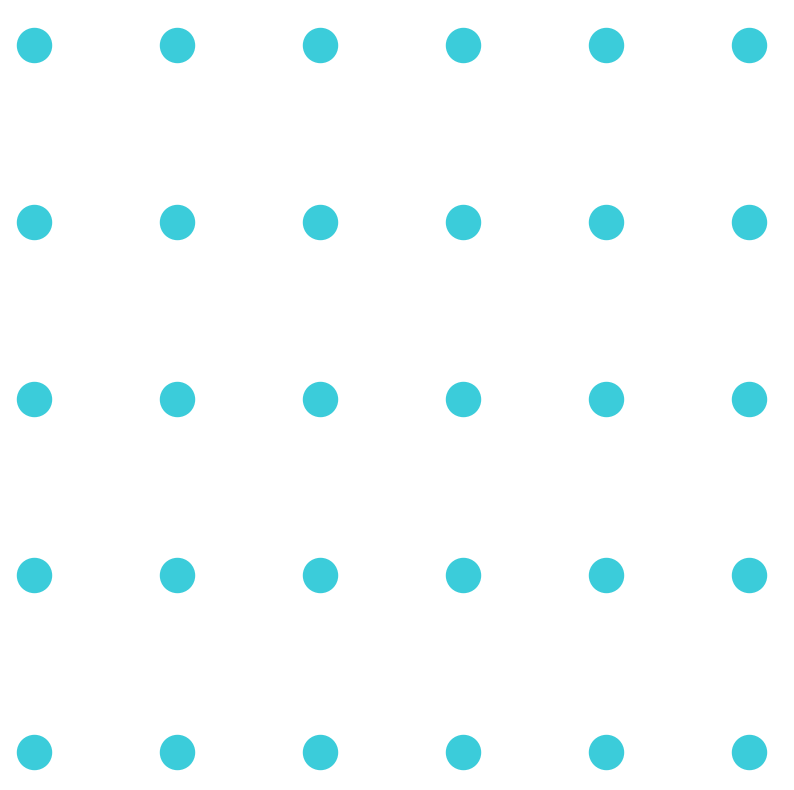

In [15]:
plot_points(array1a, array2a)

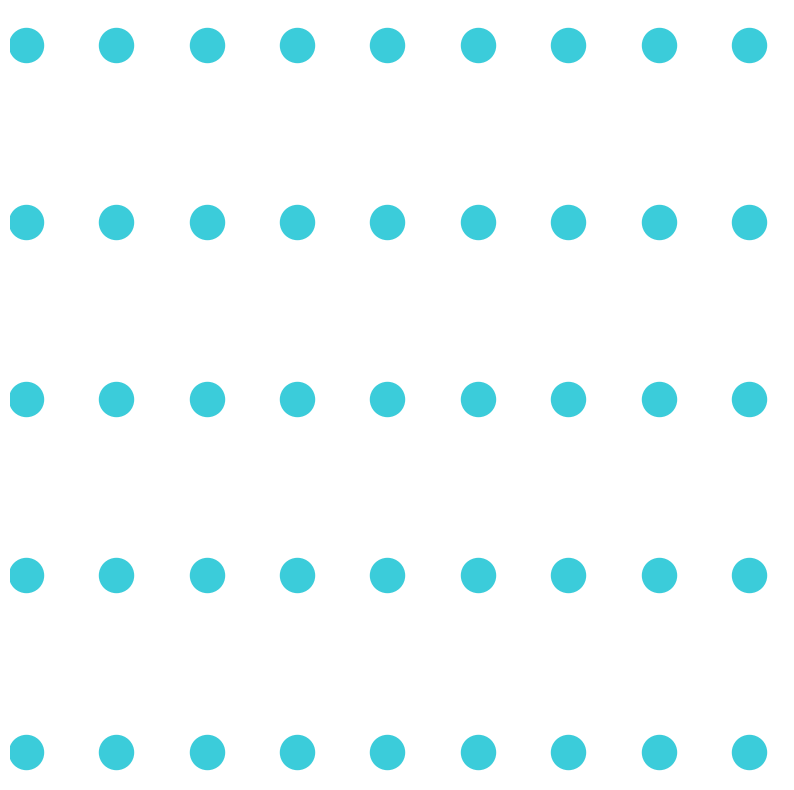

In [16]:
plot_points(array1b, array2b)

Notes: 

What do you see now? 

How many groups do you see? 

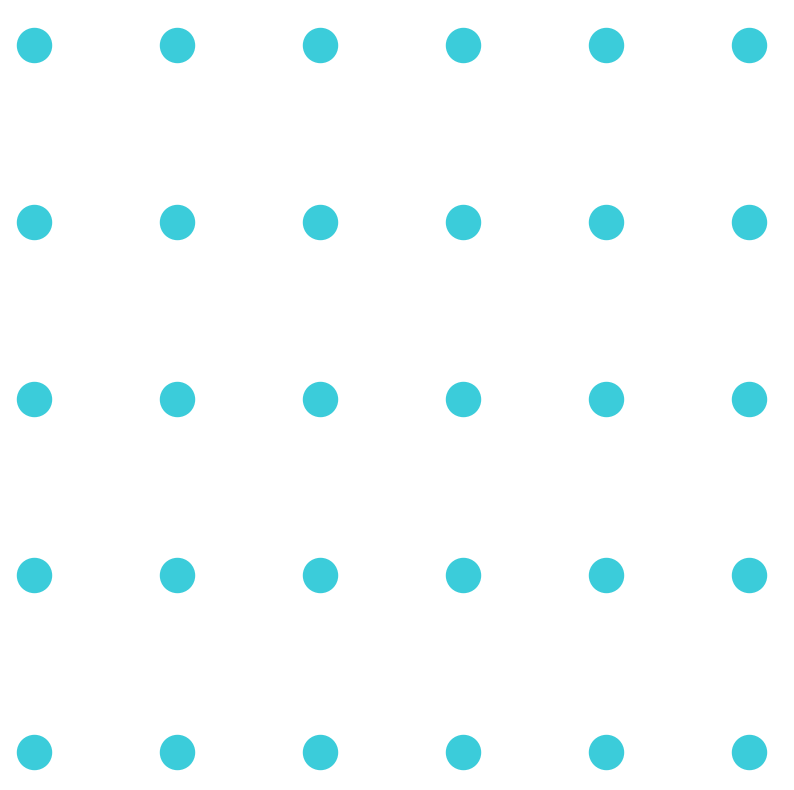

In [17]:
plot_points(array1a, array2a)

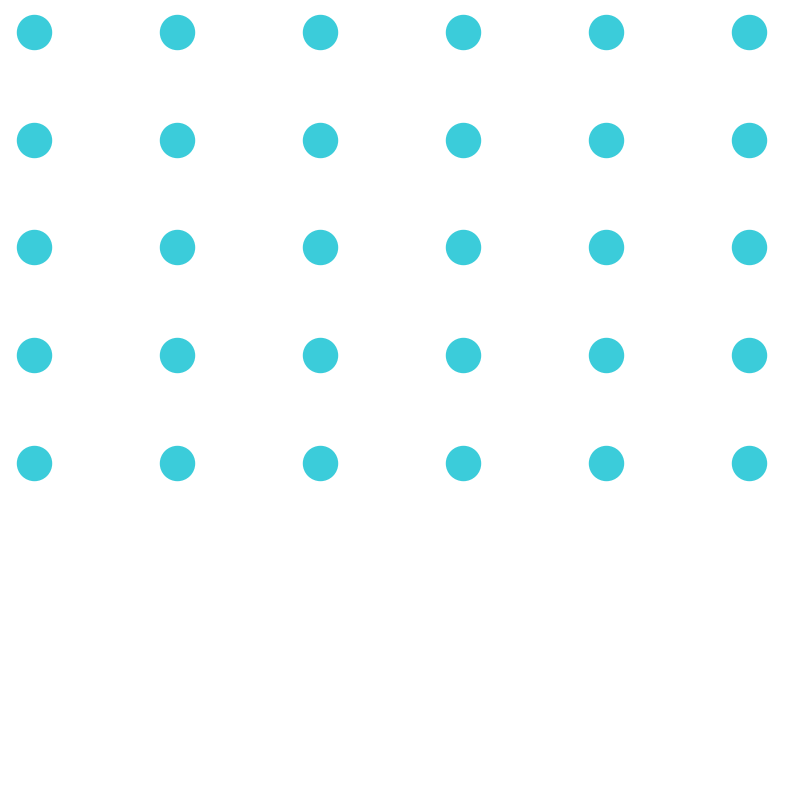

In [18]:
plot_points(array1c, array2c)

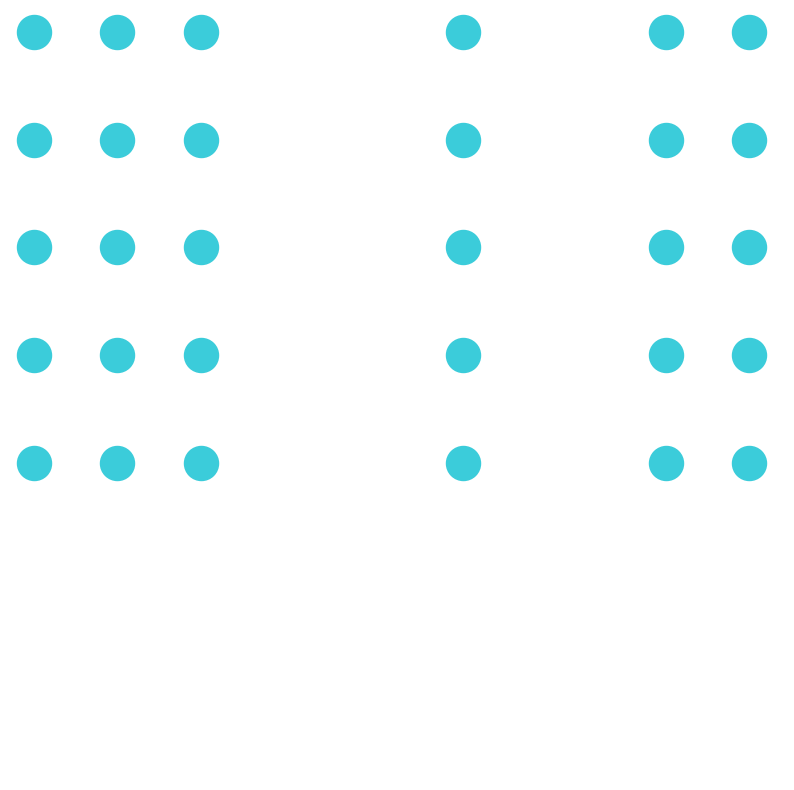

In [19]:
plot_points(array1_groups, array2_groups)

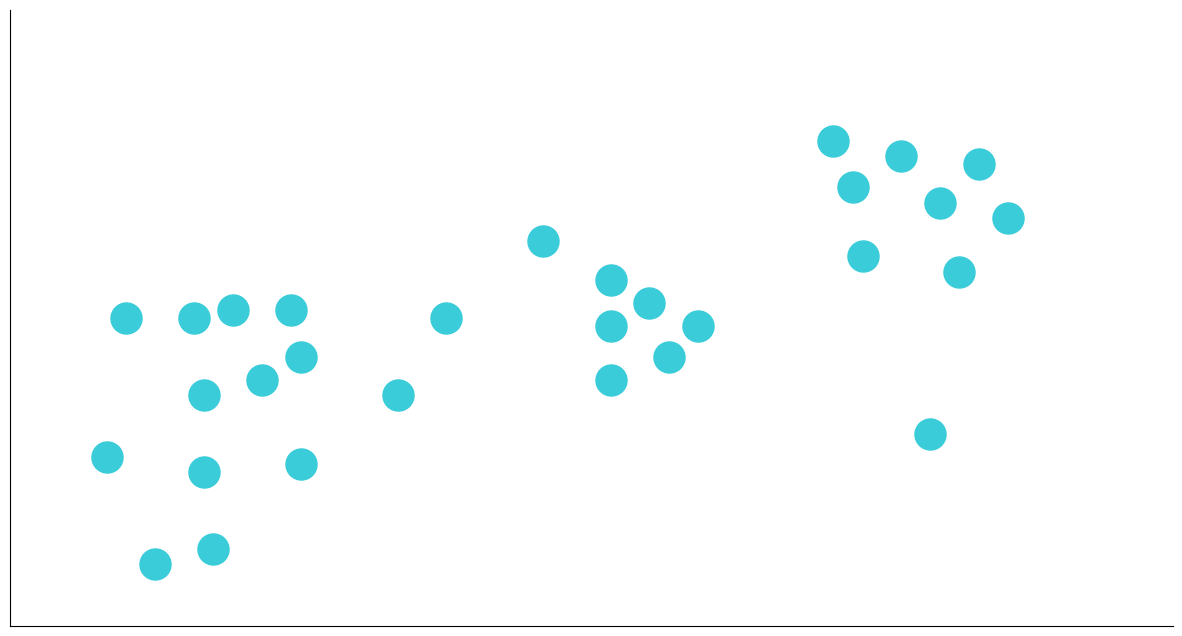

In [20]:
plot_scatter(x_scatter, y_scatter)

Notes: Let’s arrange them like this, add an axis, and hey look, I made a scatterplot!
How many groups here? What are they? Why do you perceive them as groups?
Where else do you think proximity applies?

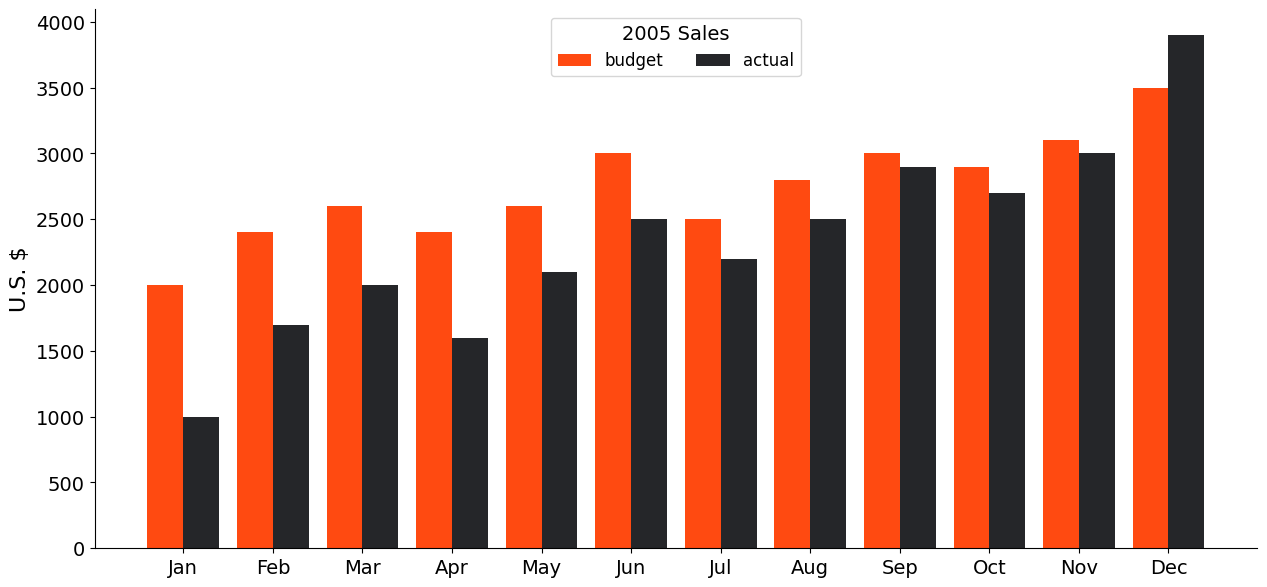

In [21]:
sales_plot(barplot=True)

Notes: Well, you might see it in grouped bar charts, like this - there’s an obvious grouping of pairs of bars because they’re close. If you remove the gaps, the graph’s much harder to read.

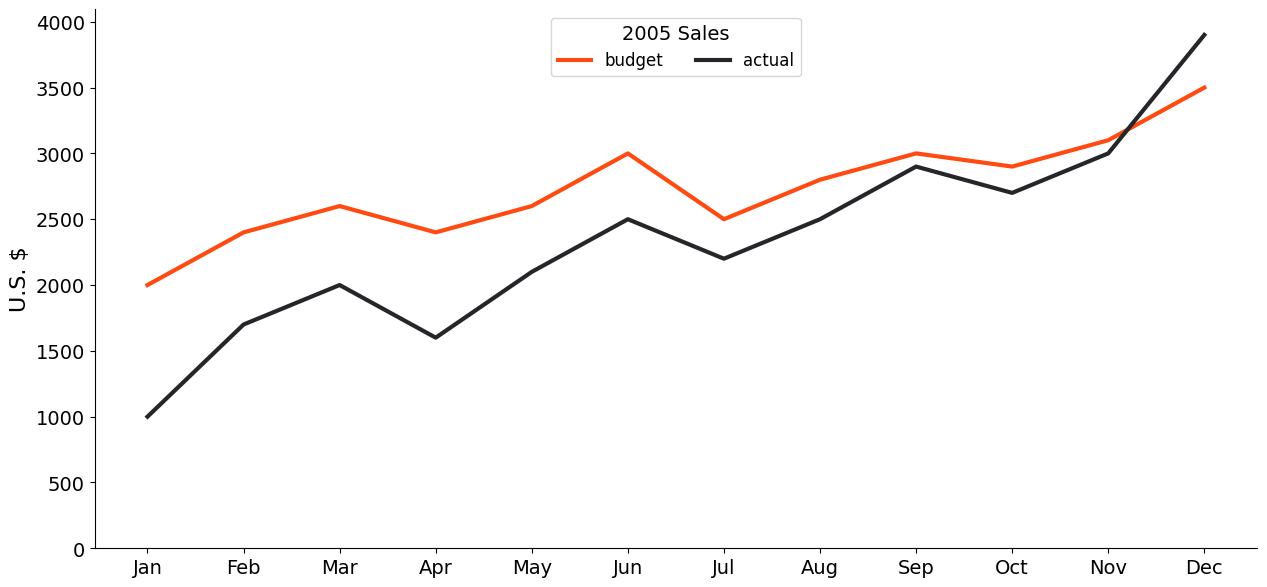

In [22]:
sales_plot(barplot=False)

Notes: Although if you’re drawing grouped bar charts when the x axis has a good natural ordering, then you might be doing it wrong.

<center>
    <b>Proximity</b><br>
</center>    

<center>
Things close to each other are grouped.
</center>    

Notes: So, that’s proximity. Things close to each other are perceived as related.

### Similarity

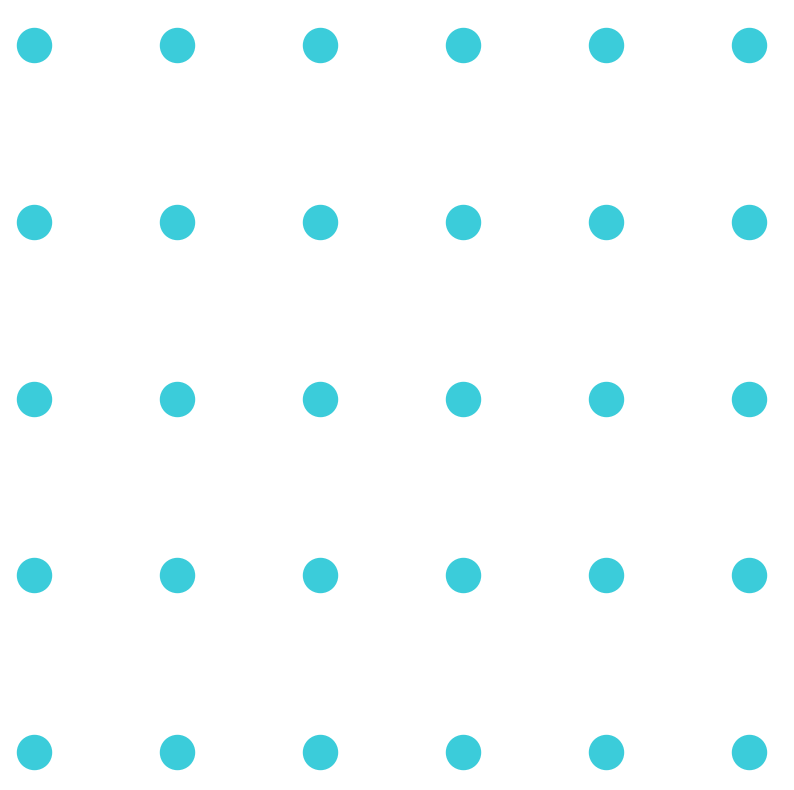

In [23]:
plot_points(array1a, array2a)

Notes: So here’s the same grid of dots. How many groups (click)?

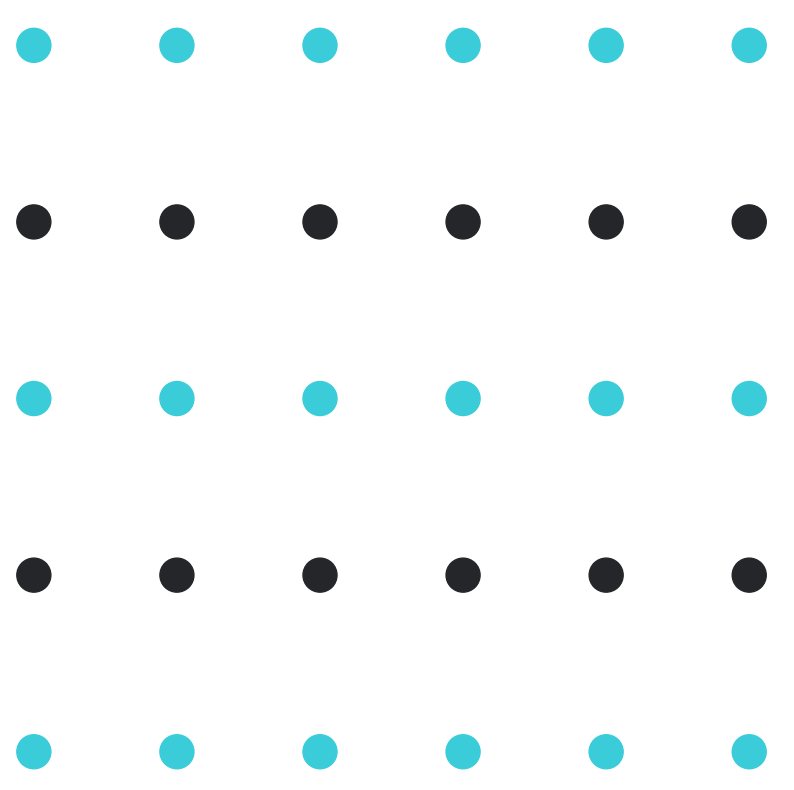

In [24]:
plot_points(array1a, array2a, labels_a)

Notes: What about now (click)?

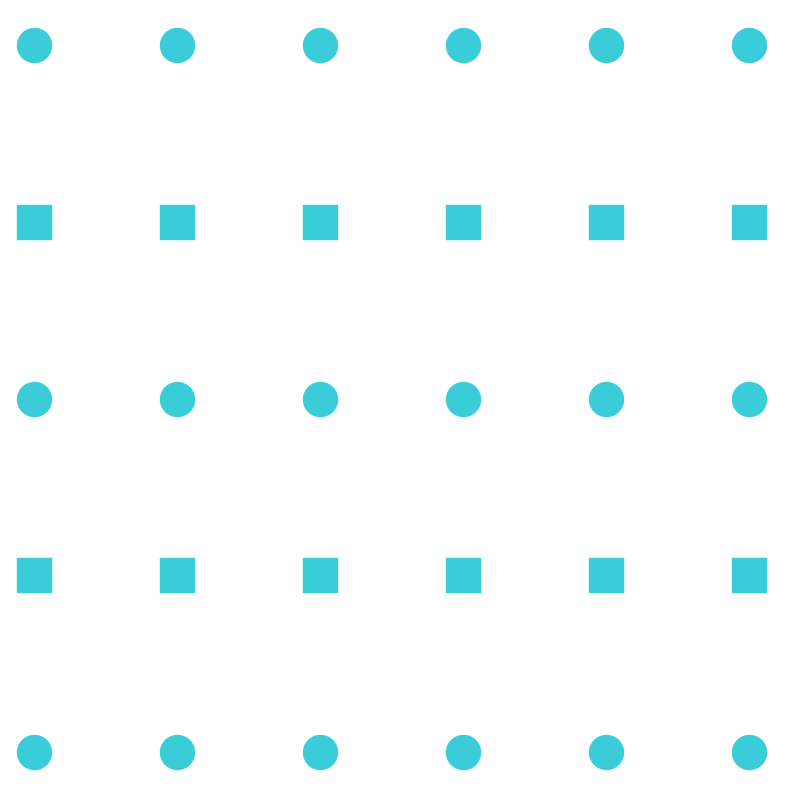

In [25]:
plot_points(array1a, array2a, labels_a, squares=True)

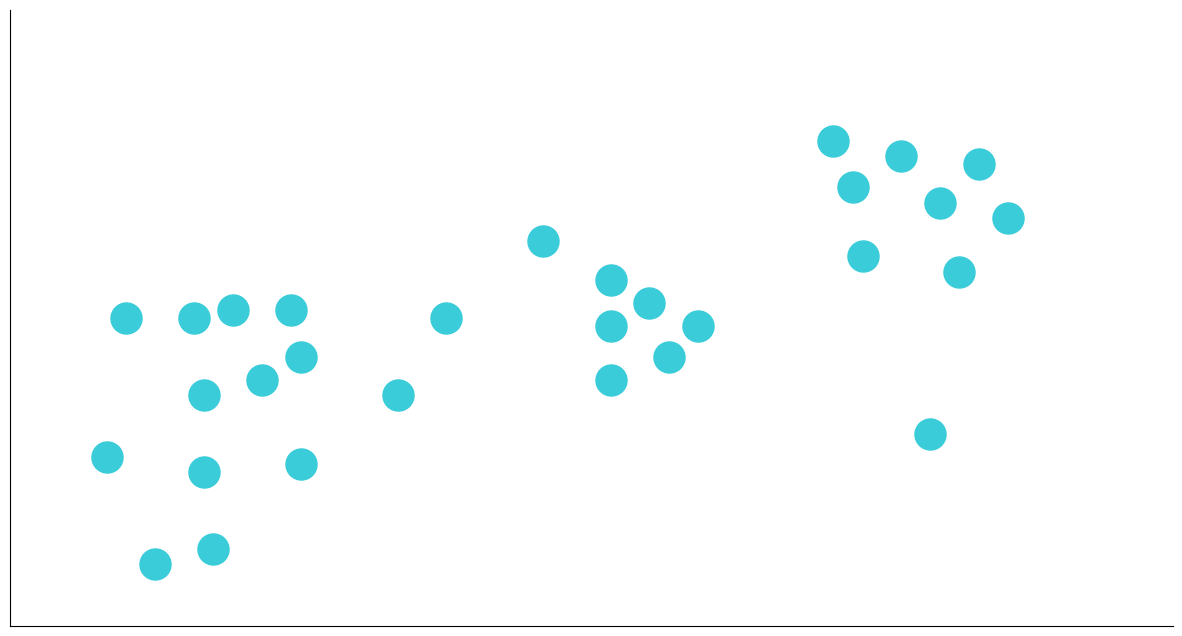

In [26]:
plot_scatter(x_scatter, y_scatter)

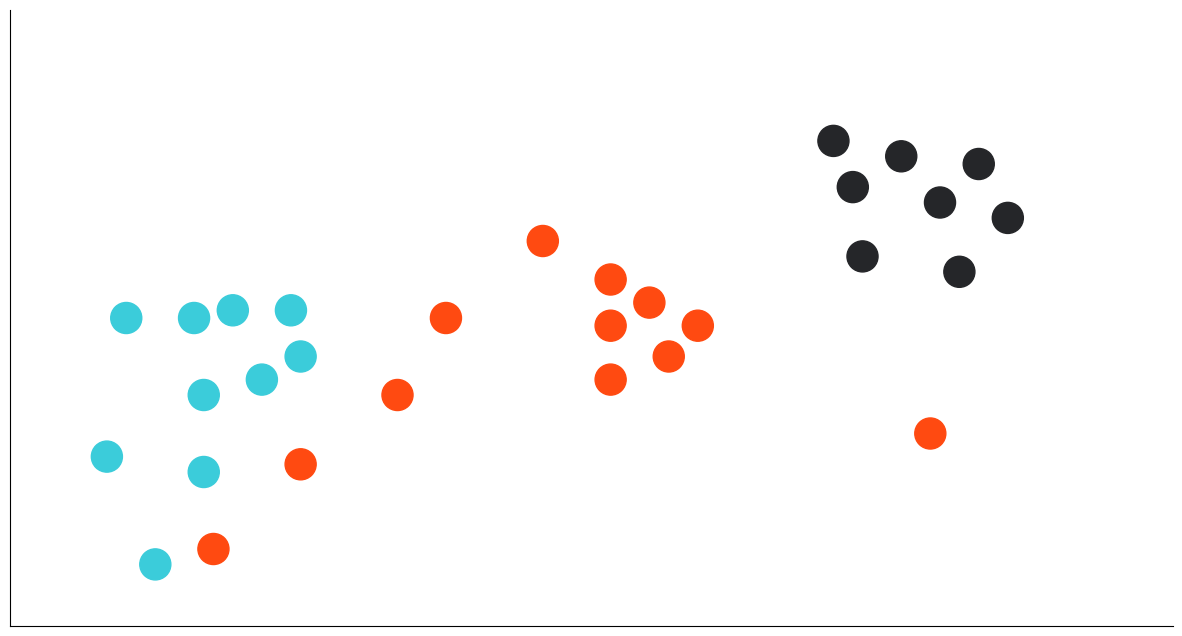

In [27]:
plot_scatter(x_scatter, y_scatter, labels=labels_a)

Notes: How many groups now? Where are they?

<center>
    <img src="../images/gestalt_principles/eagle.png" width=600>
</center>    

Notes: How many objects here? Why?
http://graphicdesign.spokanefalls.edu/tutorials/process/gestaltprinciples/gestaltprinc.htm

<center>
    <img src="../images/gestalt_principles/figures_jumping.png"  width=800>
</center>    

Notes: What stands out here? (the only one that’s *not* similar)

http://graphicdesign.spokanefalls.edu/tutorials/process/gestaltprinciples/similarity/images/anomaly01.gif

<center>
    <b>Similarity</b><br>
</center>    

<center>
Things that look similar are grouped.
</center>    

### Enclosure

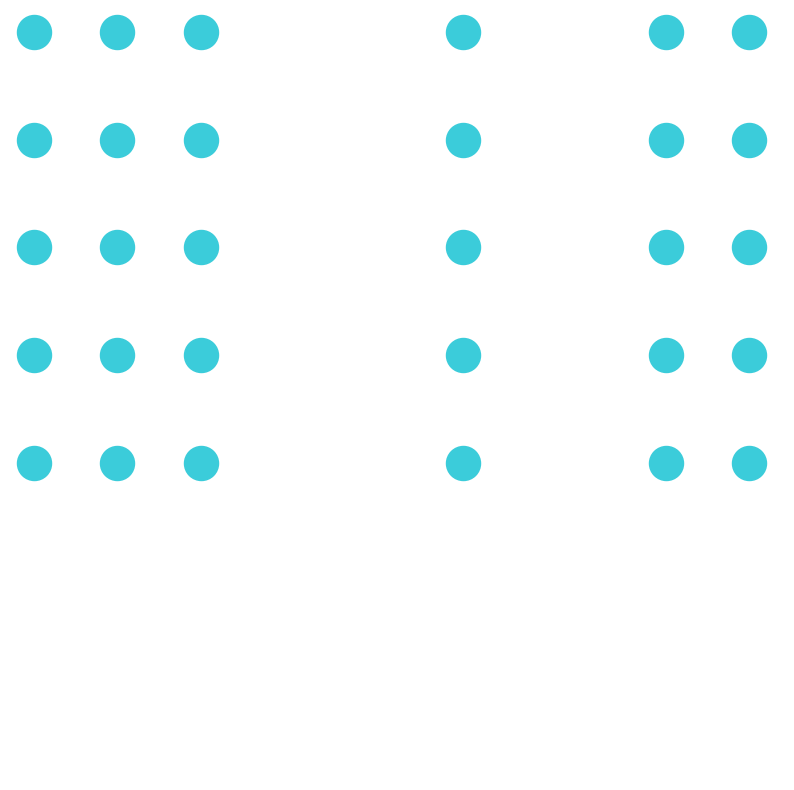

In [28]:
plot_points(array1_groups, array2_groups)

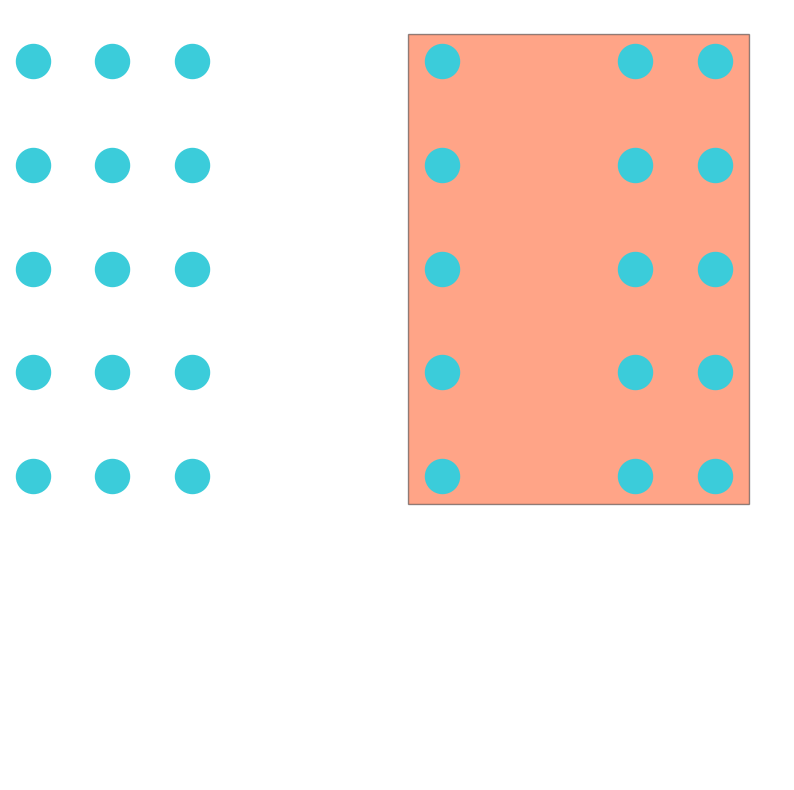

In [29]:
plot_points(array1_groups, array2_groups, rectangle_large=True)

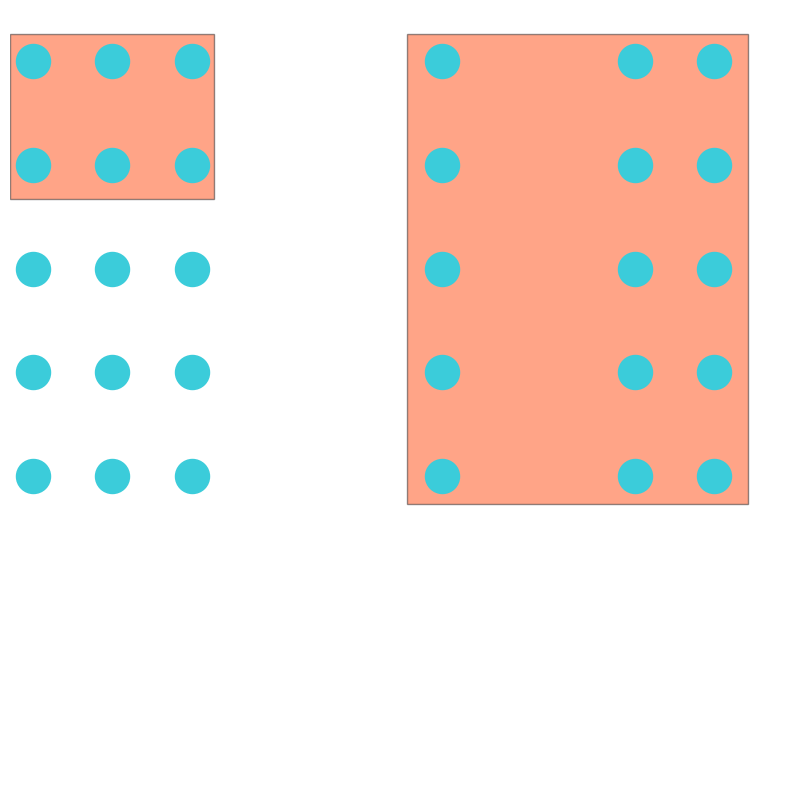

In [30]:
plot_points(array1_groups, array2_groups, rectangle_large=True, rectangle_small=True)

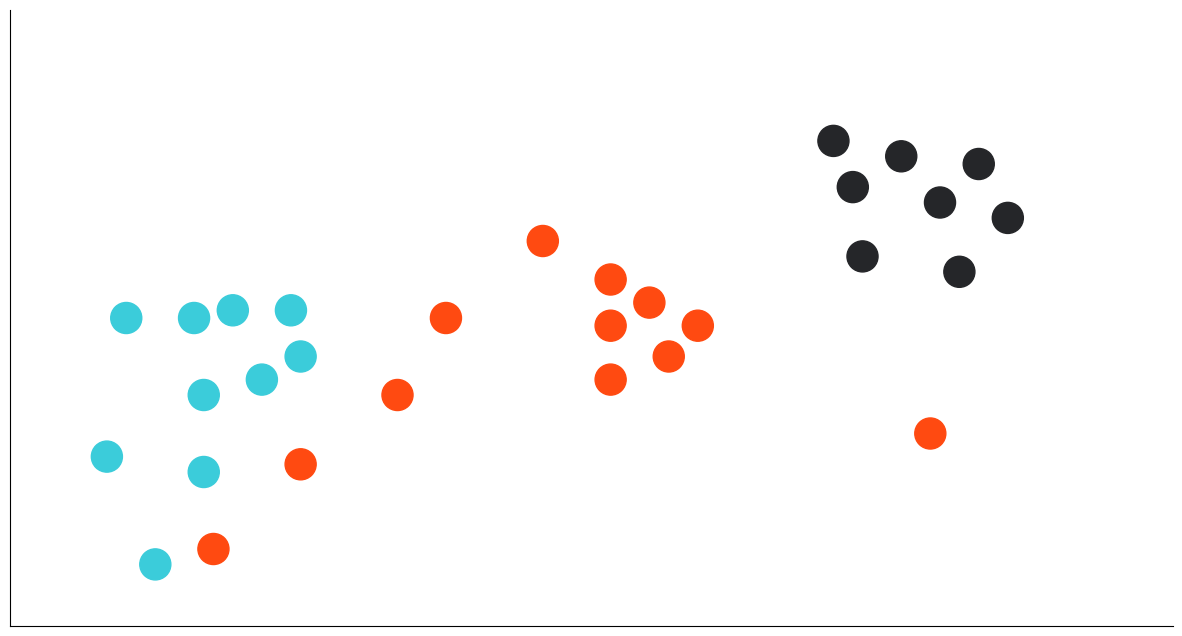

In [31]:
plot_scatter(x_scatter, y_scatter, labels=labels_a)

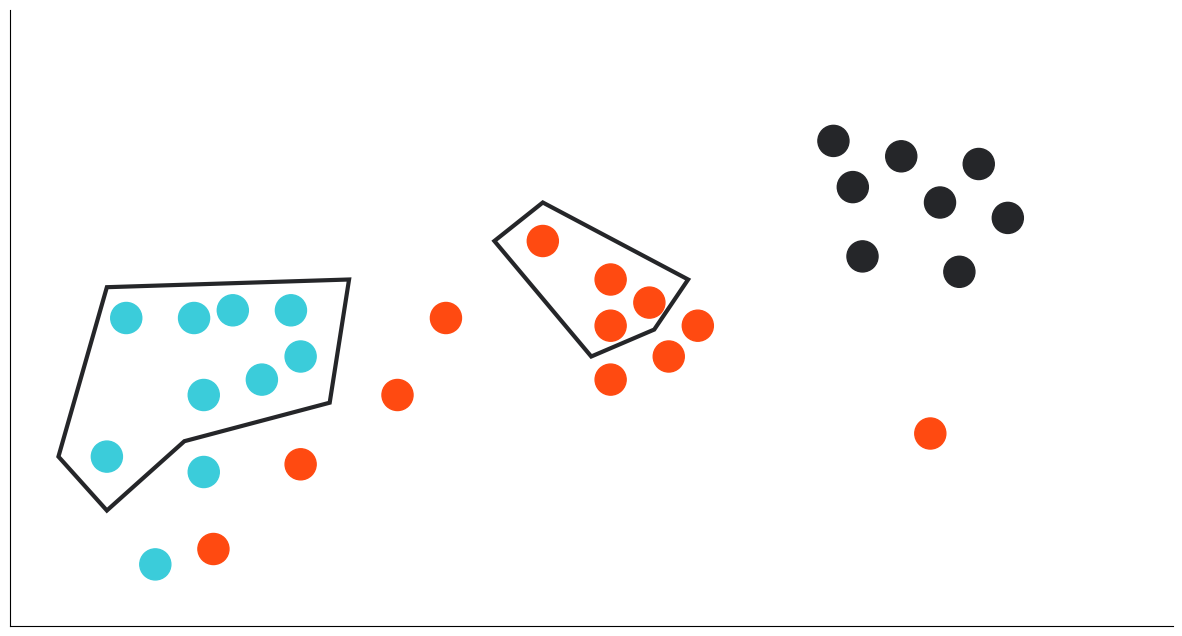

In [32]:
plot_scatter(x_scatter, y_scatter, labels=labels_a, polygon=True)

Notes: How many groups? What’s your first answer?
Does the enclosure have to be a line?

<center>
    <b>Enclosure</b><br>
</center>    

<center>
Things with a boundary around them are grouped.
</center>    

### Closure

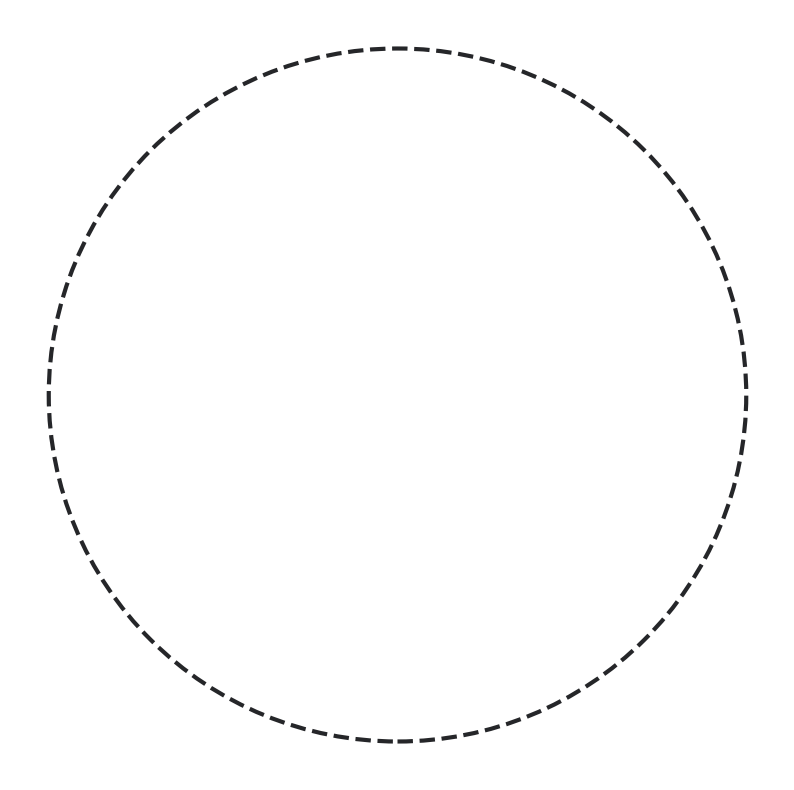

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
circle = Circle((0.5, 0.5), radius=0.45, fill=False, linestyle= "--", linewidth=3, ec=c_dark)
ax.add_patch(circle)
plt.axis("off");

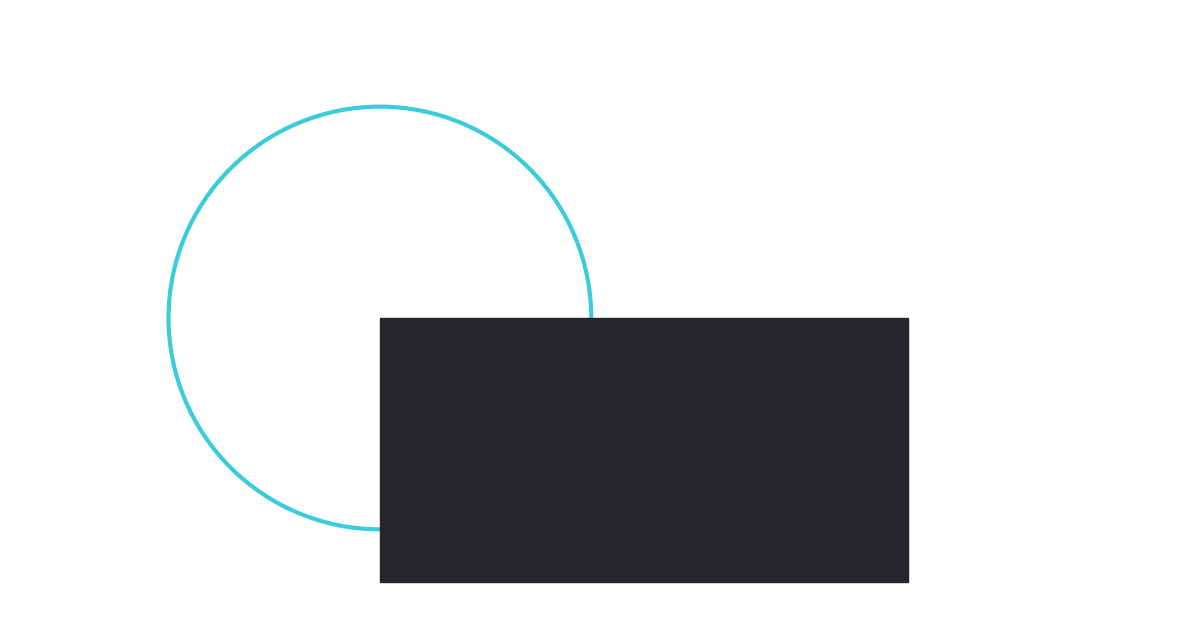

In [34]:
circle_rectangle(separate=False)

Notes: For this, please take your pen and paper and draw all the separate groups/objects you see from this image. 

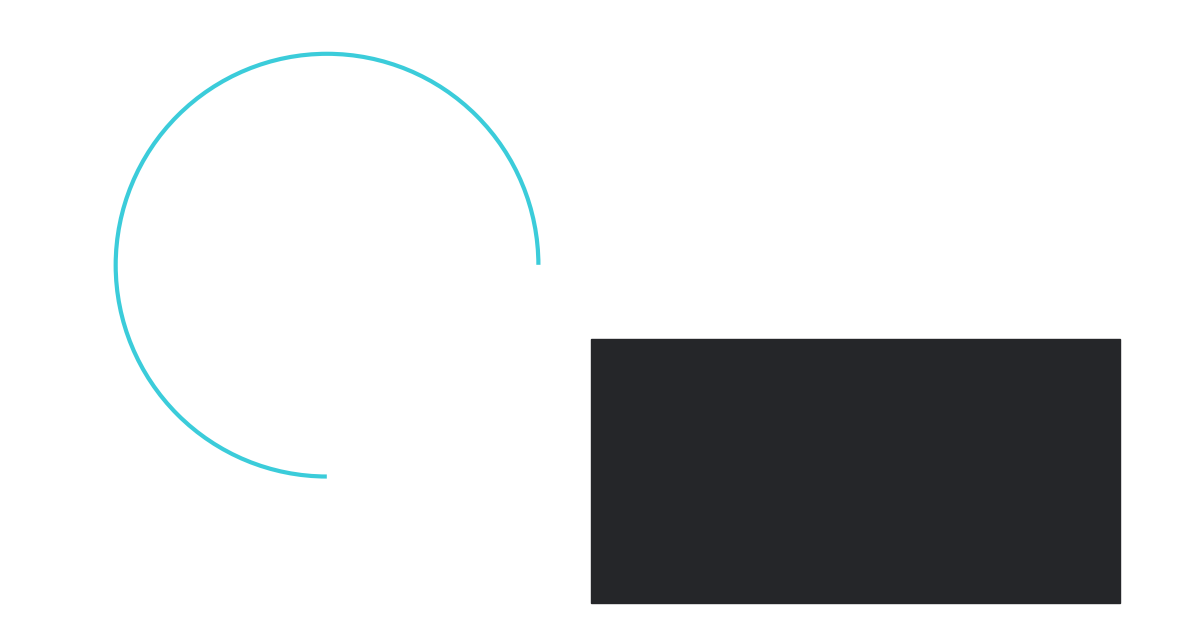

In [35]:
circle_rectangle(separate=True)

Notes: Did anyone draw this?
Turns out we’re geared to complete obvious shapes. Why does that matter?

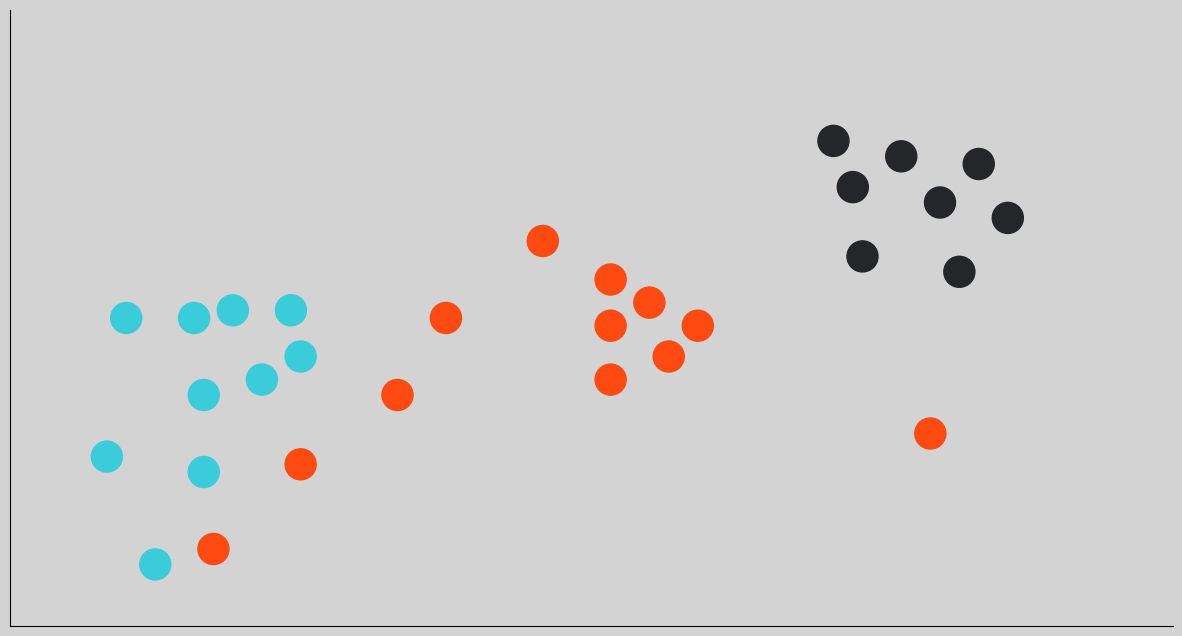

In [36]:
plot_scatter(x_scatter, y_scatter, labels_a, facecolor="lightgrey")

Notes: Well, here’s that scatterplot again - in the sort of style most graphing libraries will give you.
What principles of grouping can you see in this plot?

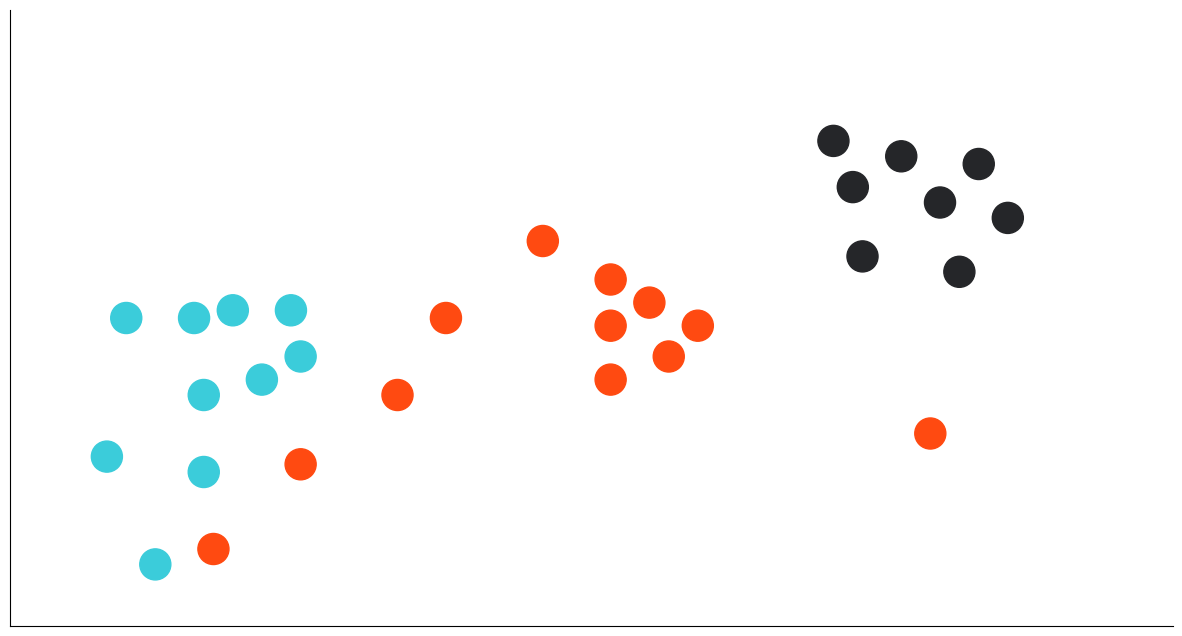

In [37]:
plot_scatter(x_scatter, y_scatter, labels=labels_a)

Notes: What happens if we remove the enclosure?

<center>
    <img src="../images/gestalt_principles/panda.png"  height: 90vh>
</center>    

Notes: I have some other examples (anyone know where the panda’s from?)

That’s right, it’s the WWF logo.

https://www.smashingmagazine.com/2014/03/design-principles-visual-perception-and-the-principles-of-gestalt/

<center>
    <img src="../images/gestalt_principles/polar_bear.png"  width=1000>
</center>    

<center>
    <img src="../images/gestalt_principles/wwf.png"  width=1000>
</center>  

<center>
    <img src="../images/gestalt_principles/cube.png"  height: 90vh>
</center>  

Notes: One more. Why do we see it? It’s clearly not there.

<center>
    <b>Closure</b><br>
</center>    

<center>
We like seeing closed shapes.
</center>    

### Continuity

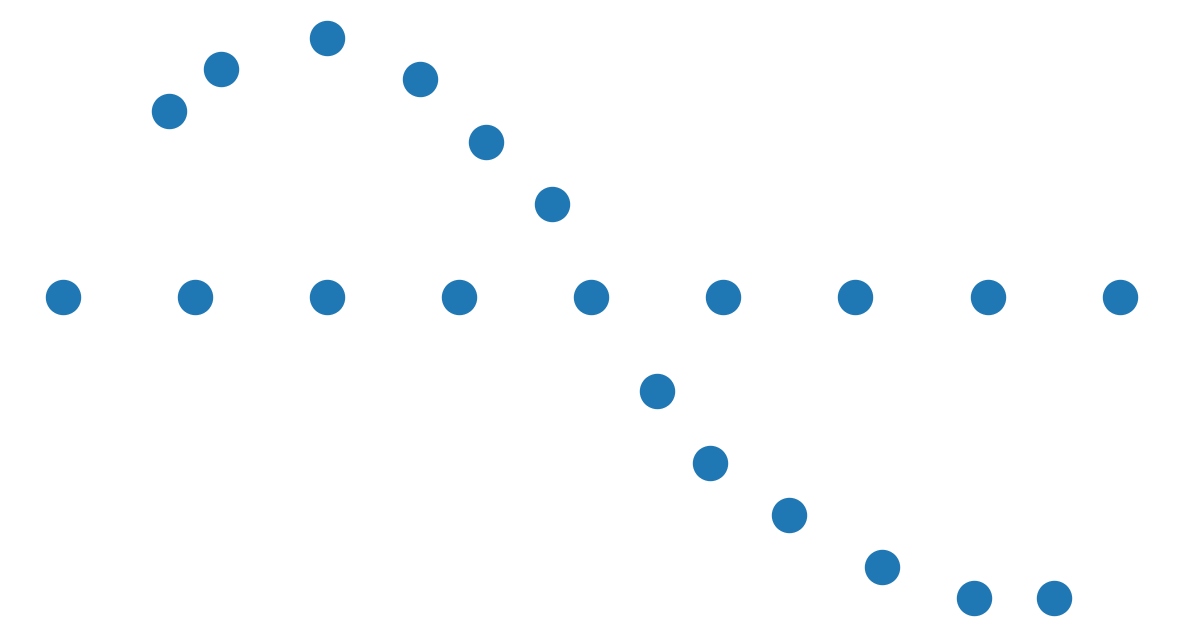

In [38]:
plot_continuity()

Notes: Look, here’re some more dots. How many groups? What would they be? Draw them split out.

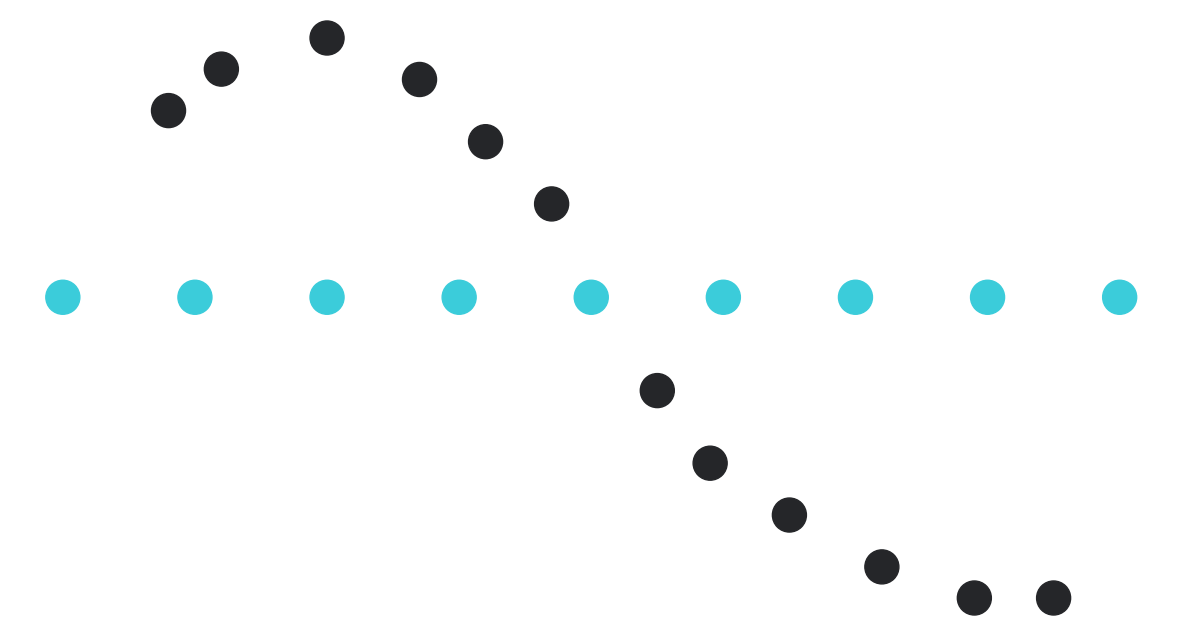

In [39]:
plot_continuity(labels=labels_continuity_1)

Notes: Probably you said something like this, right?

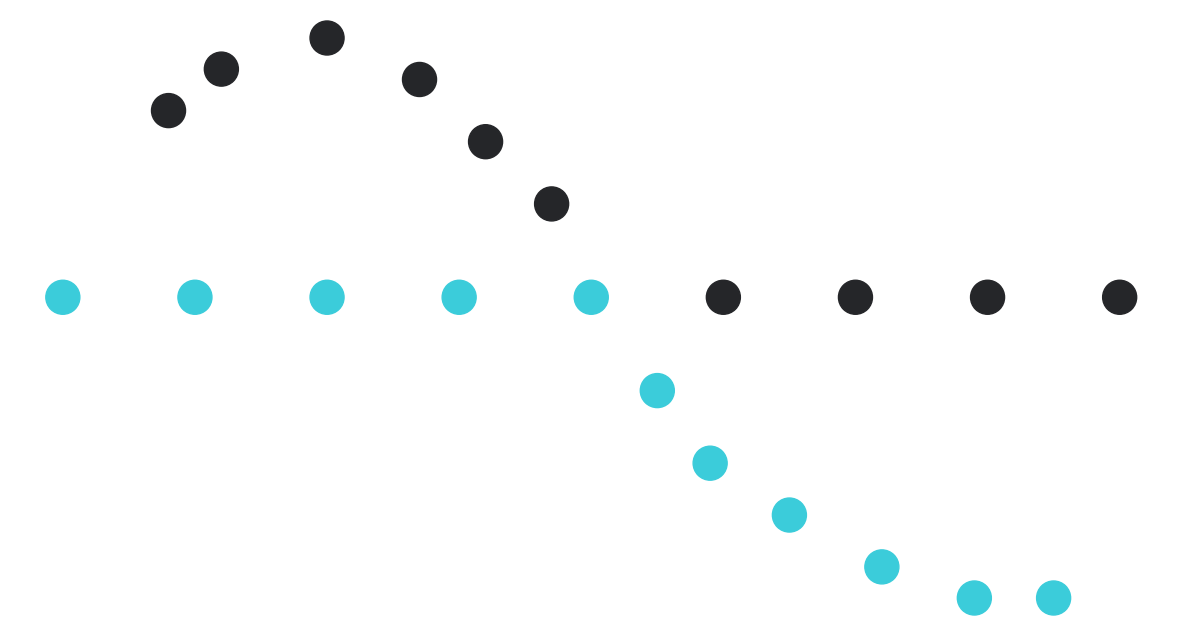

In [40]:
plot_continuity(labels=labels_continuity_2)

Notes: But it could equally be this…

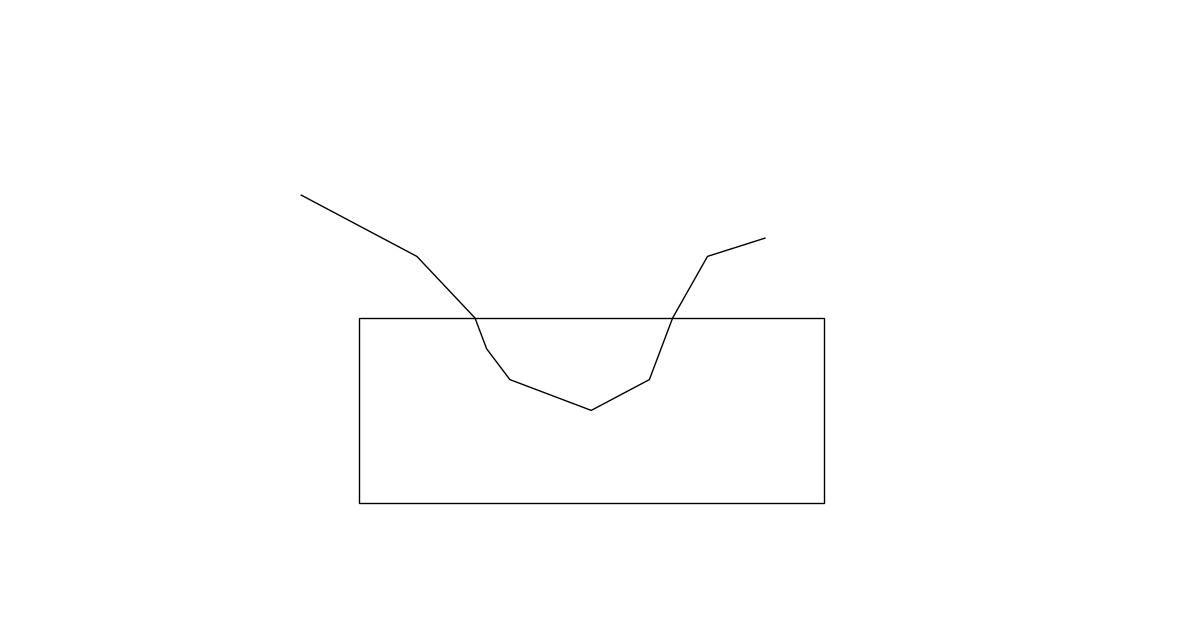

In [41]:
plot_rectangel_polygon(weird_version=False, offset=0)  

Notes: Let’s look at this one. How many shapes? What are they? Draw it!

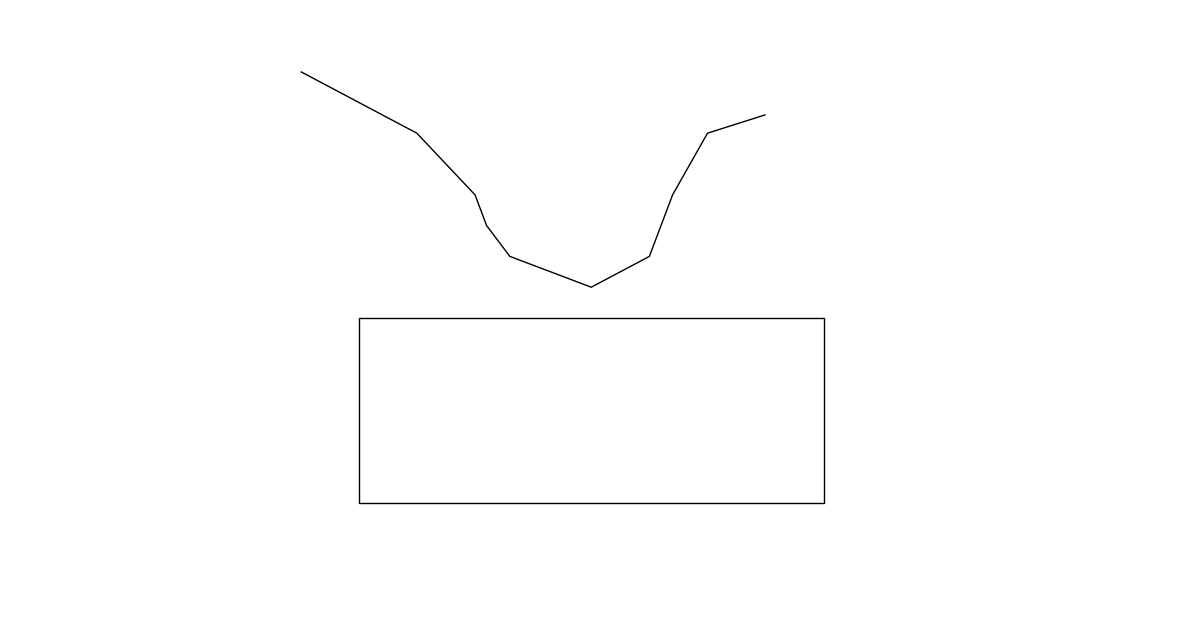

In [42]:
plot_rectangel_polygon(weird_version=False, offset=0.2)  

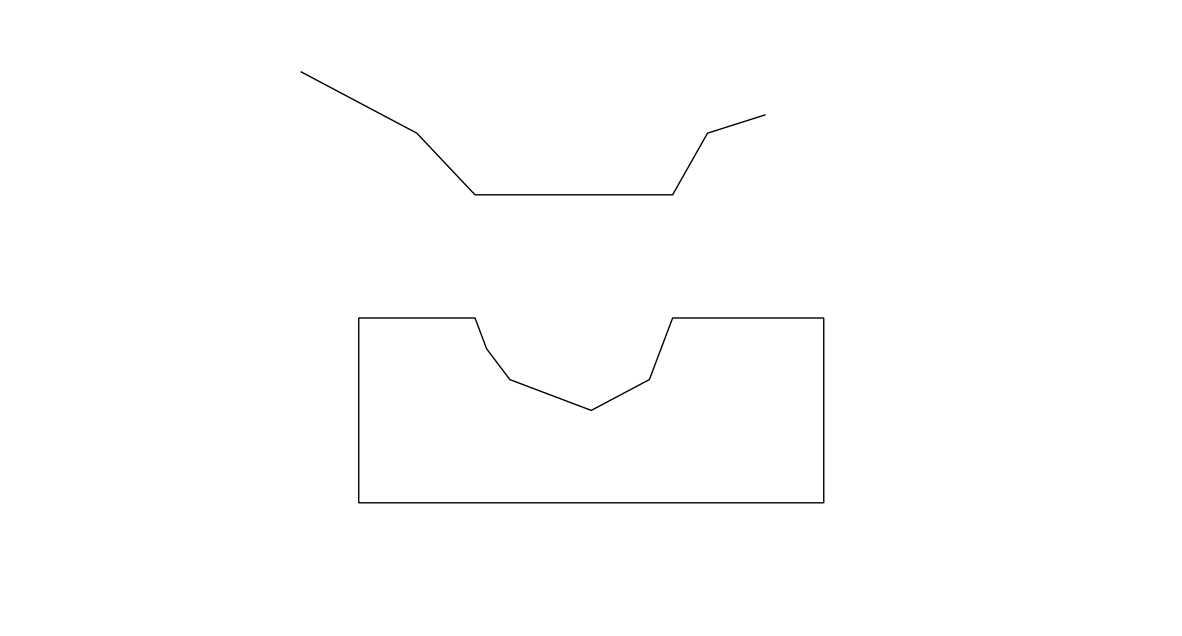

In [43]:
plot_rectangel_polygon(weird_version=True, offset=0)  

Notes: Or this?

As you might’ve guessed, turns out we’ll always prefer the first one.

This has some slightly surprising applications for visualisation, actually.

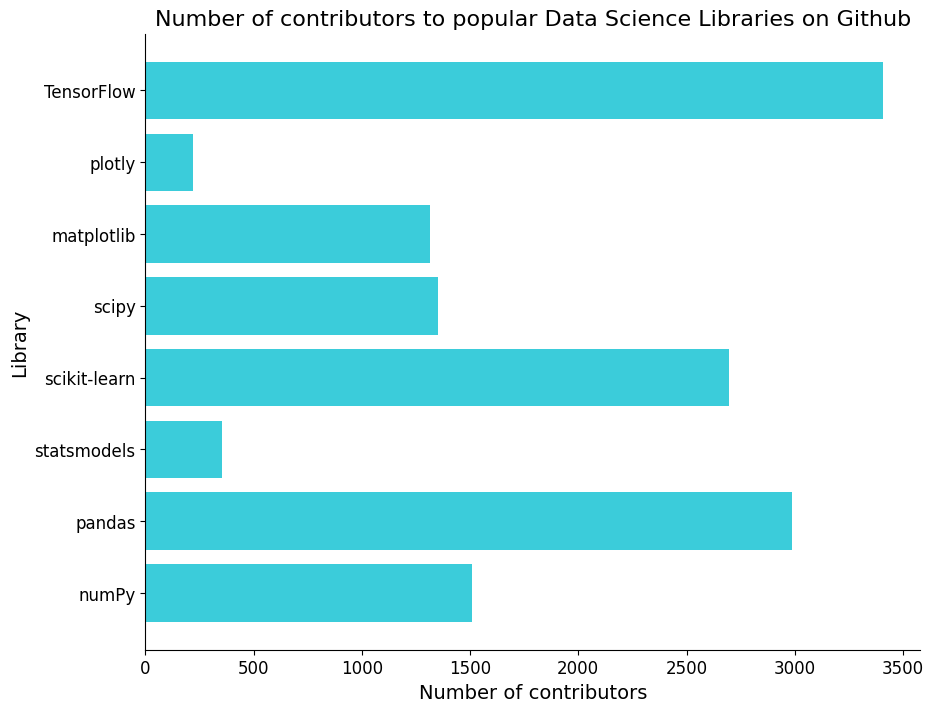

In [44]:
plot_libraries(sort=False)

Notes: Here’s a bar chart. Where does continuity come in? What order is it in? Is that a good order? Why?

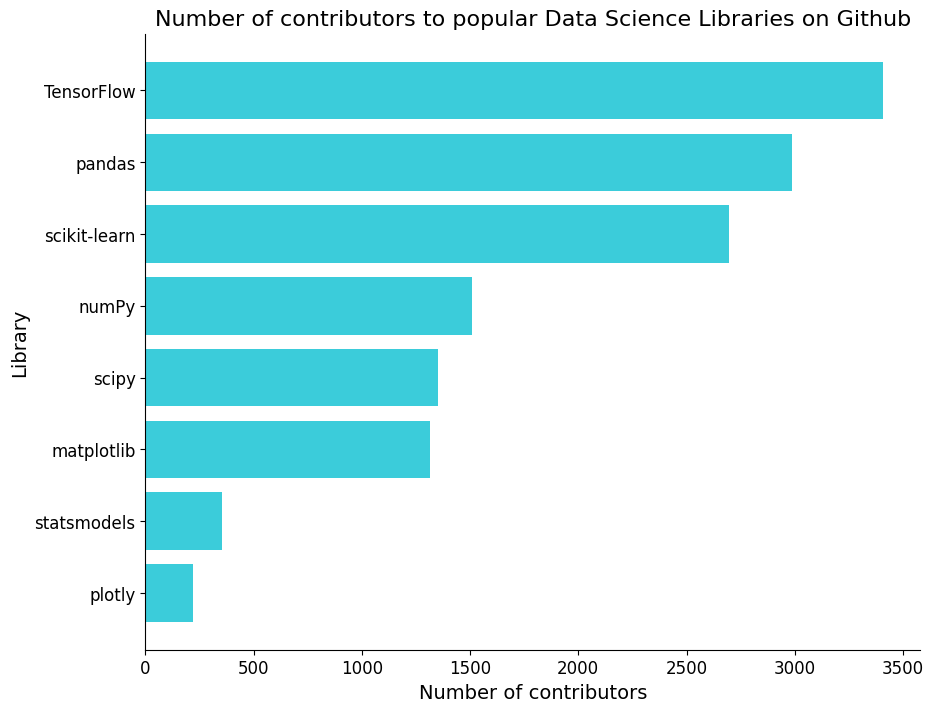

In [45]:
plot_libraries(sort=True)

Notes: How about now? Which is easier to read? What extra information can you get from this one?

<center>
    <b>Continuity</b><br>
</center>    

<center>
Objects are grouped if they’re aligned or form a continuation of one another.
</center>    

### Connection

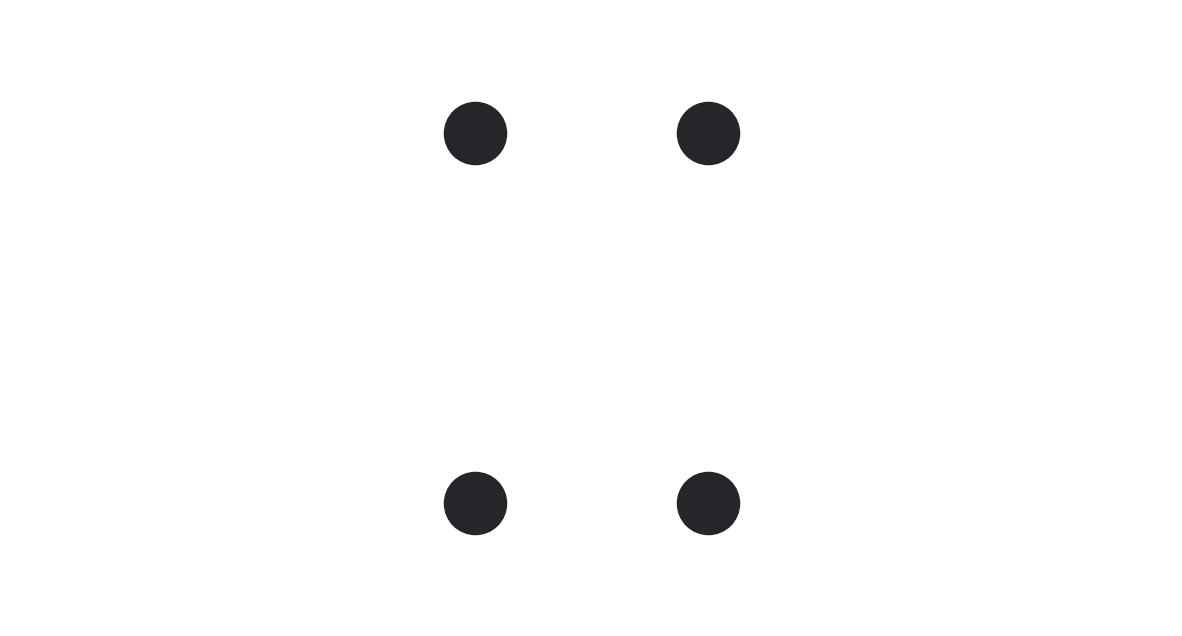

In [46]:
plot_connection(connection=False, style=None, rectangle=False)    

Notes: And guess what, more dots. You know the drill, how many groups and what are they (click)?

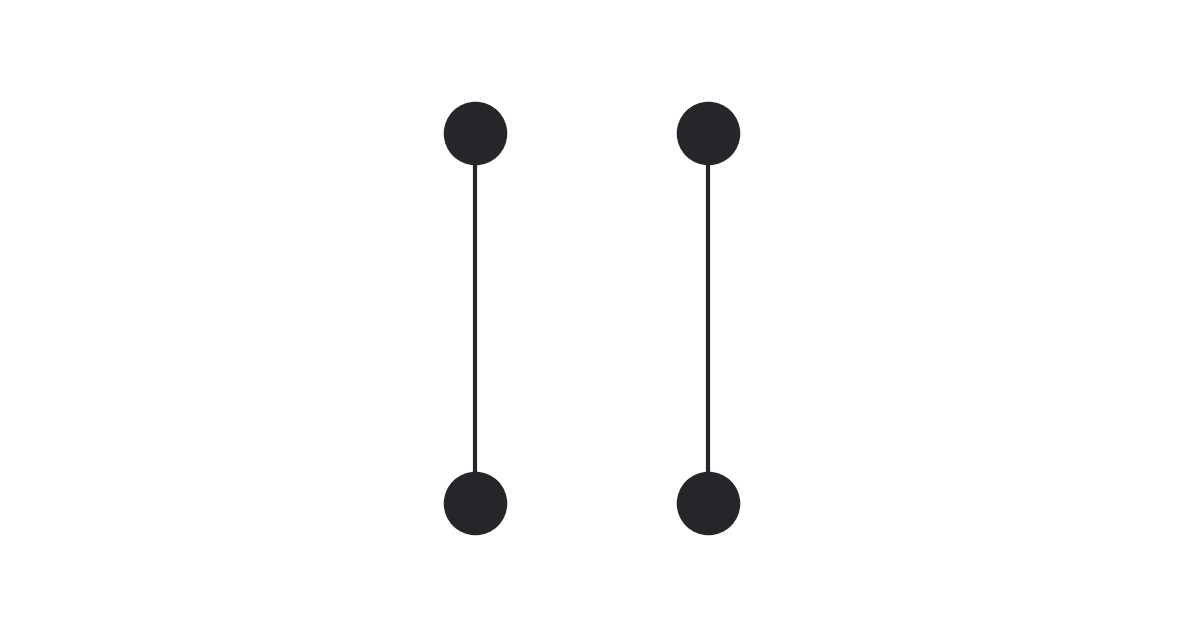

In [47]:
plot_connection(connection=True, style=None, rectangle=False)  

Notes: And now (click)?

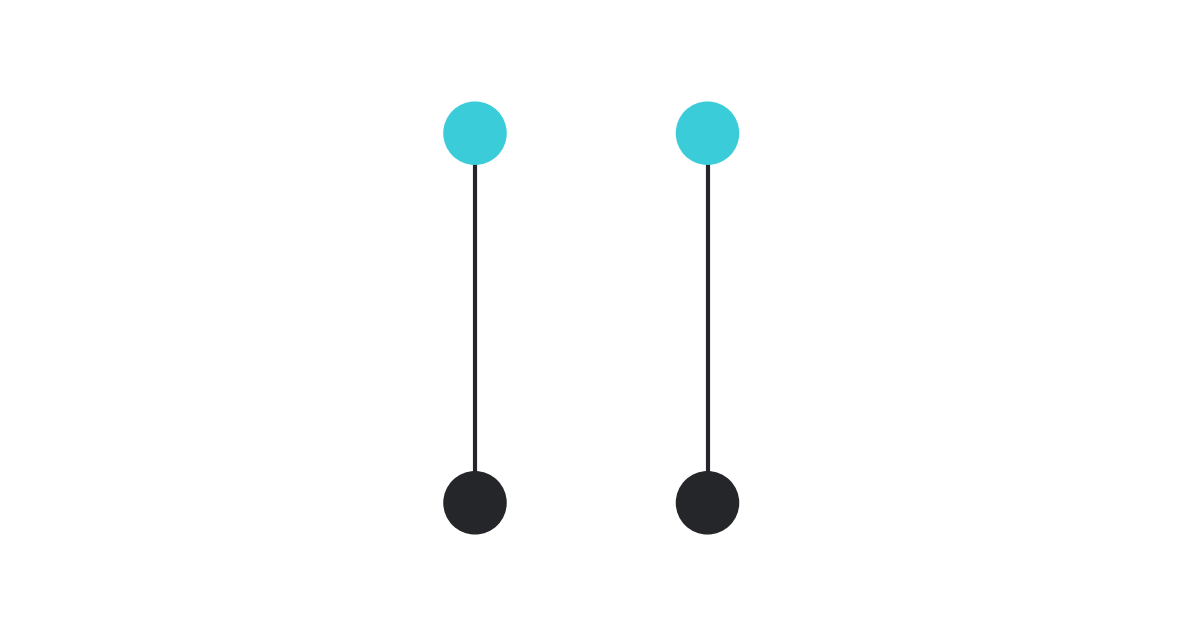

In [48]:
plot_connection(connection=True, style="color", rectangle=False)  

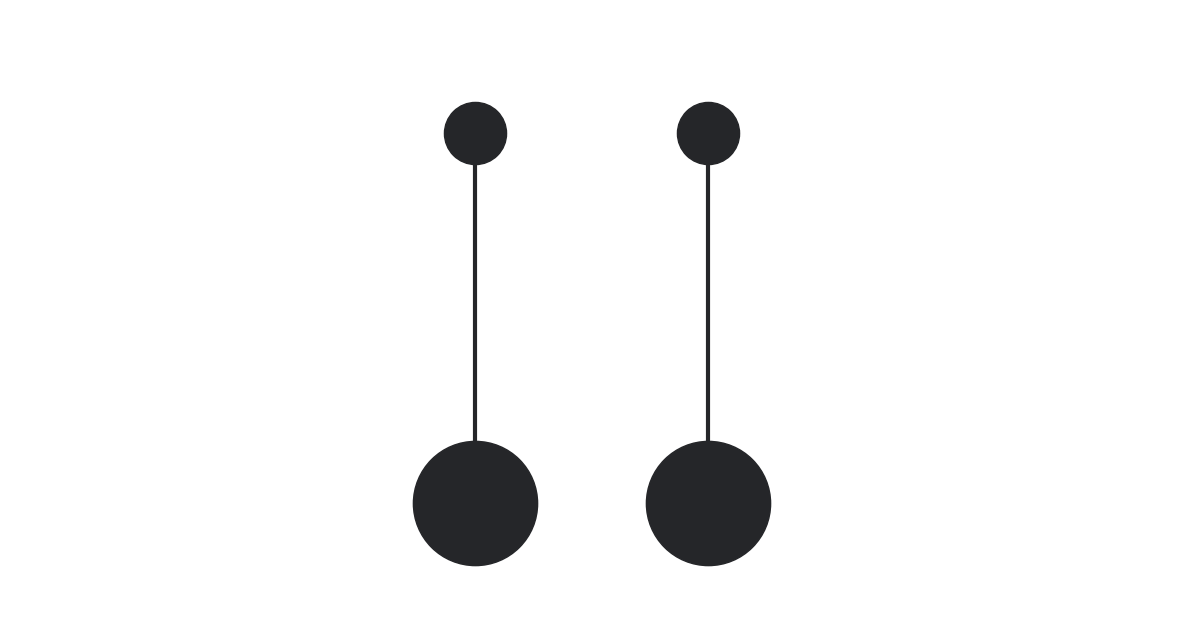

In [49]:
plot_connection(connection=True, style="size", rectangle=False)  

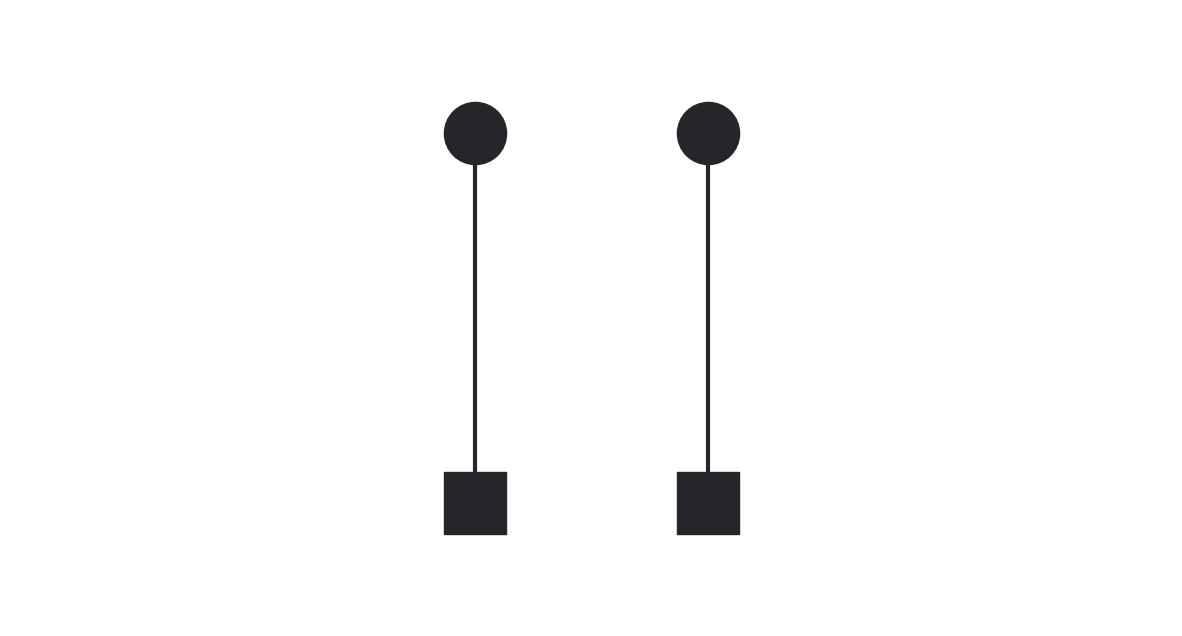

In [50]:
plot_connection(connection=True, style="marker", rectangle=False)  

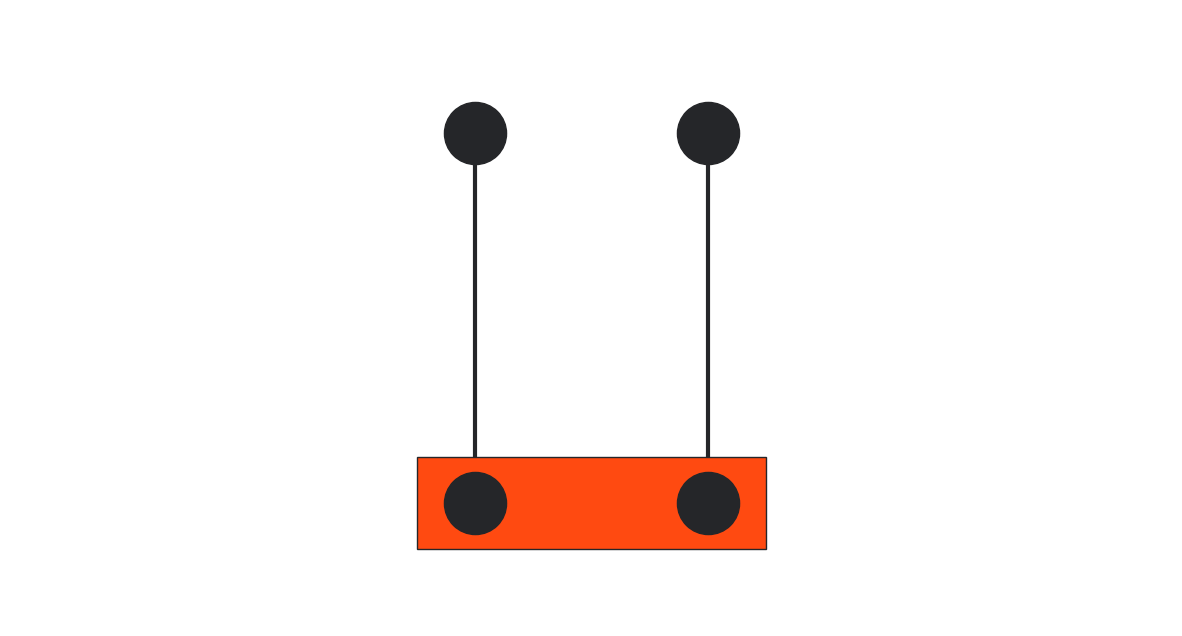

In [51]:
plot_connection(connection=True, style=None, rectangle=True)  

Notes: So connection beats a lot of other principles - it’s ahead of proximity, of similarity of colour and size and shape, but loses to enclosure. 

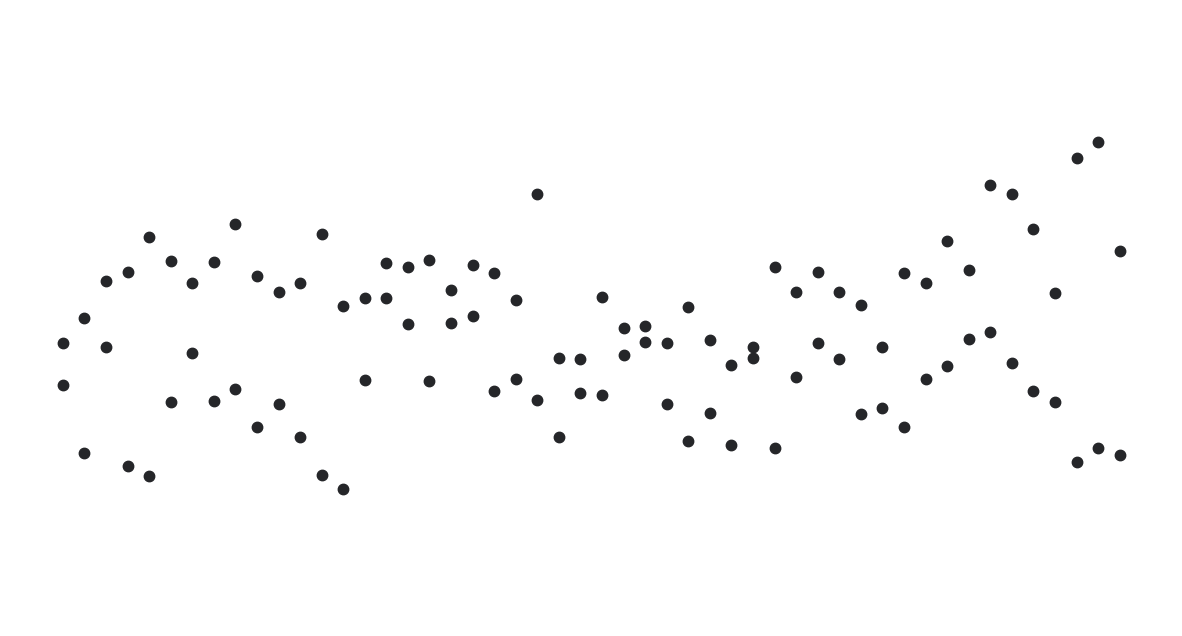

In [52]:
plot_connection_data(connection_data, color=False, line=False)

Notes: Where do we use it? Well, here’s some more dots. 

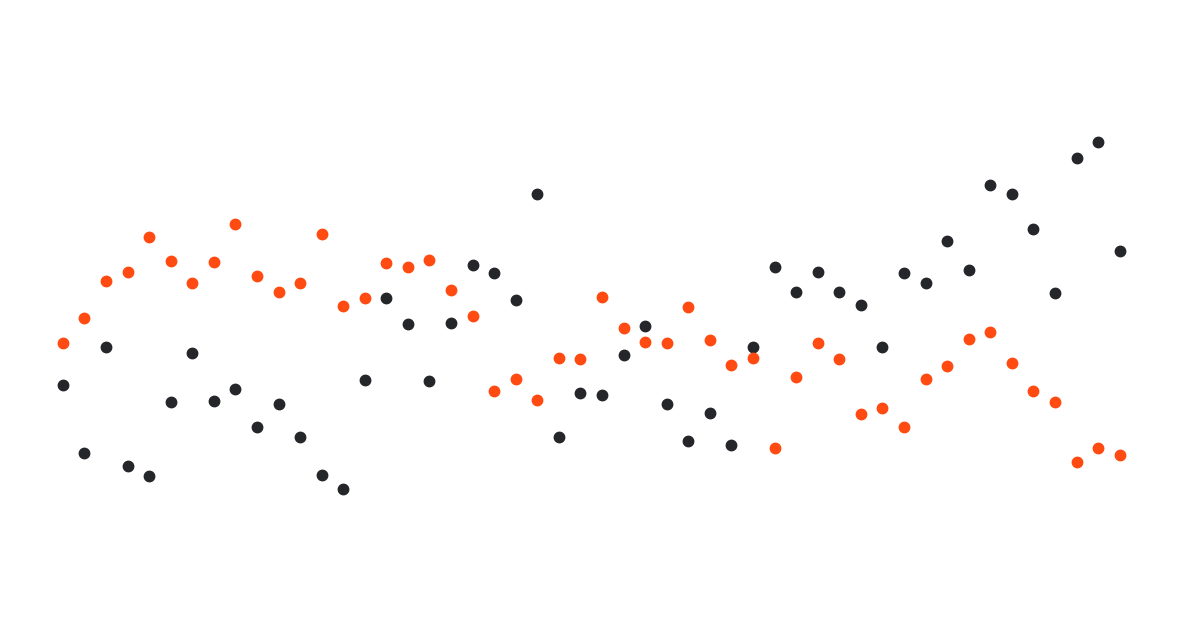

In [53]:
plot_connection_data(connection_data, color=True, line=False)

Notes: We can use colour to distinguish series.

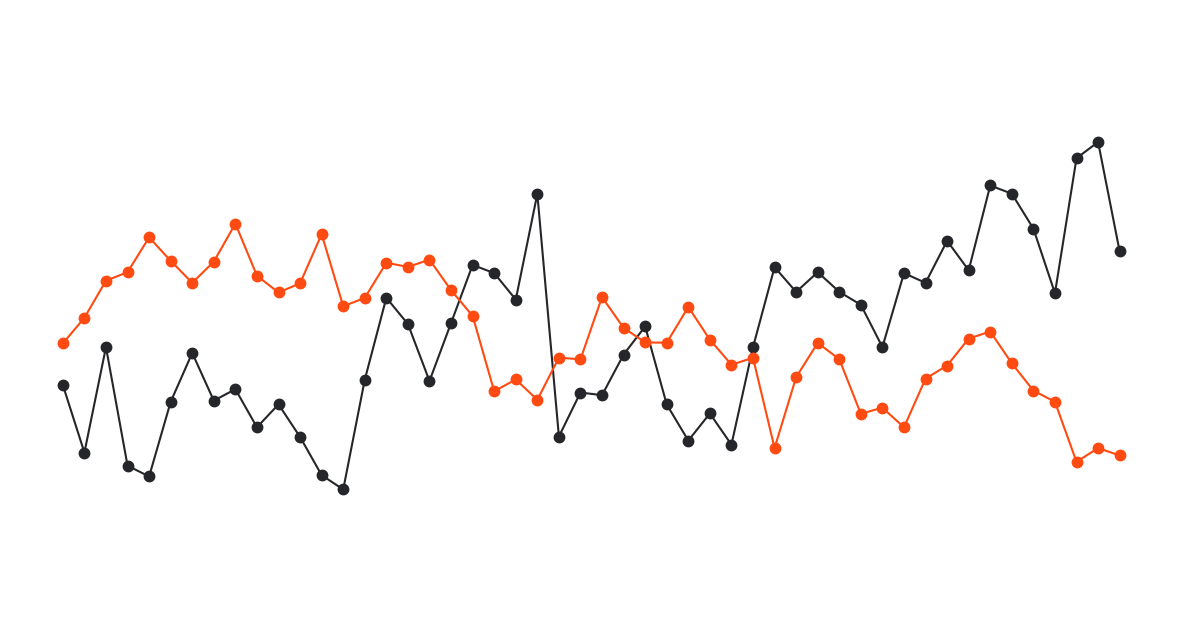

In [54]:
plot_connection_data(connection_data, color=True, line=True)

Notes: But we can also use connection to join them up, and that’s when we end up with a line chart.

http://www.excelcharts.com/blog/data-visualization-excel-users/gestalt-laws/

<center>
    <b>Connection</b><br>
</center>    

<center>
Things explicitly connected are … connected.
</center>    

## So... that's it?

## Pretty much...

<center>
Proximity<br>
Similarity<br>
Enclosure<br>
Closure<br>
Continuity<br>
Connection<br>
</center>

Notes: we looked at proximity, similarity, enclosure, closure, continuity and connection.
Does anyone remember the definitions?

They’re not all the principles, but I think they’re the most useful ones.

## Bonus Principle

### Figure and Ground

Notes: It's the principle/ability to distinguish/separate foreground ("figure") and background ("ground"). 

<center>
<img src="../images/gestalt_principles/face_vase.png" width=800>
</center>

Notes: I have three questions for you here.
Can you see the vase? Can you see the faces? Can you see both at the same time?

<center>
<img src="../images/gestalt_principles/face_vase_2.png" width=800>
</center>    

Notes: That one’s a variant of what’s called ‘Rubin’s Vase’.

https://en.wikipedia.org/wiki/Rubin_vase

<img src="../images/gestalt_principles/fedex.png">

Notes: Last one.

Can you see the arrow?
http://www.fastcodesign.com/1671067/the-story-behind-the-famous-fedex-logo-and-why-it-works

## References

* Colin Ware, Information Visualization: Perception for Design
* Stephen Few, Show Me the Numbers
* Cole Nussbaumer Knaflic, Storytelling with Data

(Ware’s work is more detailed, the others pretty much just use the same summary)<br>
There’s some interesting more recent work from people like Steve Palmer if you’re after papers to read.